#  AI ML Cohort 4 : Group 1

## Un-Supervised Learning - Assignment 2 - D1

##  Student Names :

    ## Chandresh Khaneja | 2020AIML062 
    ## Sudheendran T L   | 2020AIML003
    ## Sudhir Valluri    | 2020AIML001

## File Name : Unsupervised_Learning_Assignment2_Group1_v12.ipynb

## Date of Submission : Sun 30-May-2021

## Declaration of libraries as required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import Library for Performing Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

#Import Library for Performing Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Import Library to perform PCA (for Dimensionality Reduction)
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Import Library to perform DBSCAN clustering
from sklearn.cluster import DBSCAN

# Import Library to perform some metrics
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
%matplotlib inline
from scipy import stats
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Acquisition / Collection / Extraction : Retrieve Country Dataset

In [3]:
df = pd.read_csv("Country-data.csv")

# 1. Pre - processing / Feature Engineering

In [4]:
# inspect the first 10 rows using the head method of the dataframe object
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [5]:
# inspect the last 10 rows using the head method of the dataframe object
df.tail(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


## Checking the Shape of the Country Dataset

In [6]:
# inspect how many rows x columns are there in the input data, using the shape variable of the dataframe
df.shape

(167, 10)

## Checking the Columns of the Country Dataset

In [7]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Verify the Data Types of Country Dataset

In [8]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## Checking for Info of Country Dataset

### To Confirm nature of columns for any presence of NULL / NaN / Missing values etc. in any columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Data Cleaning : Check for NA values

In [10]:
df.isna().count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

## Data Cleaning : Check for Null values 

In [11]:
df.isnull().values.any()

False

## Data Cleaning : Check for Missing Values

In [12]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Data Cleaning : Check for Duplicates

In [13]:
df.duplicated()
duplicate_rows_df = df[df.duplicated(keep = 'last')]
print("Duplicates ", duplicate_rows_df)

Duplicates  Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


## Observation : 
## Based on the pre - processing performed above there were 'NO' Null Or NaN Or Missing Or Duplicate Values Found in Country Dataset

## Country Dataset provided is clean and hence we can move forward with our analysis

# 2. Exploratory Data Analysis (EDA)

## Perform Descriptive Statistics

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [15]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


## Correlation Matrix with Heatmap

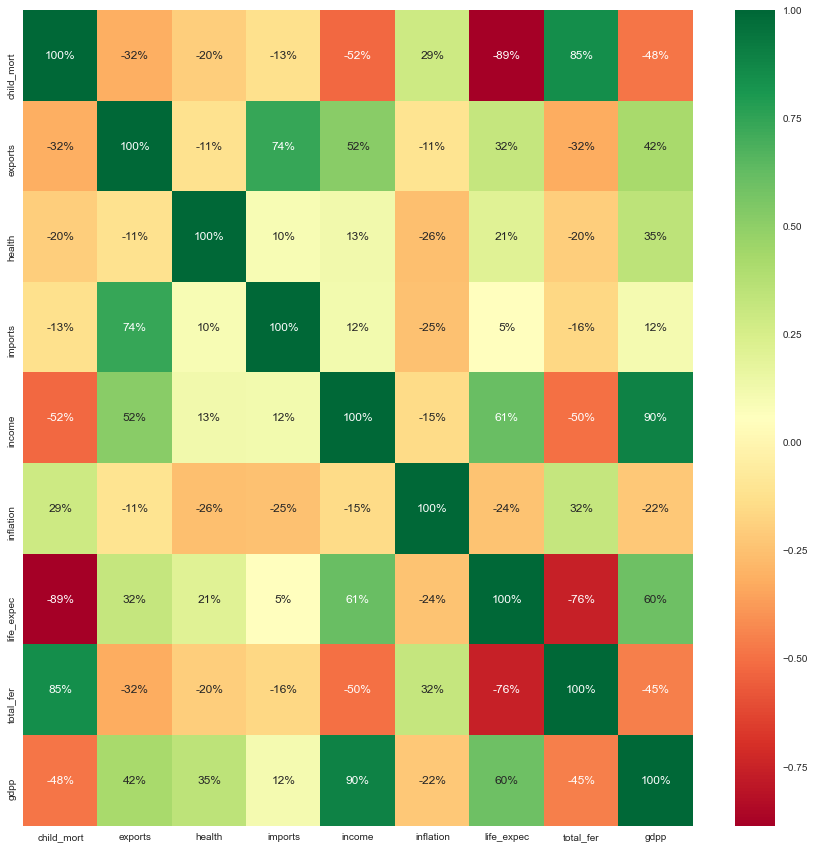

In [16]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

#plot heat map
plt.figure(figsize=(15,15))
sns.heatmap(df[top_corr_features].corr(), annot=True, fmt ='.0%',cmap="RdYlGn")
plt.show()

## Data Visualization on Country Dataset

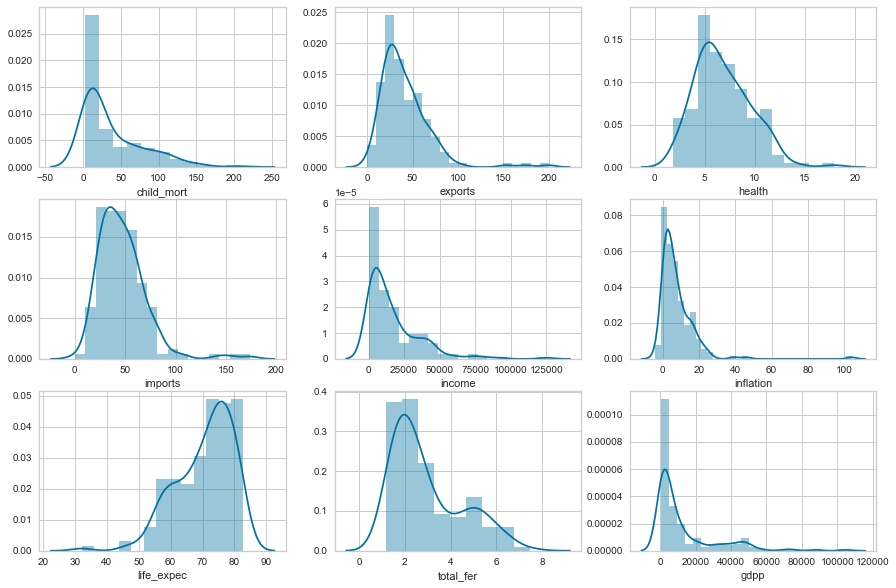

In [17]:
plt.figure(figsize=(15,10))
feature = df.columns[1:len(df.columns)]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

## Child Mortality Rates

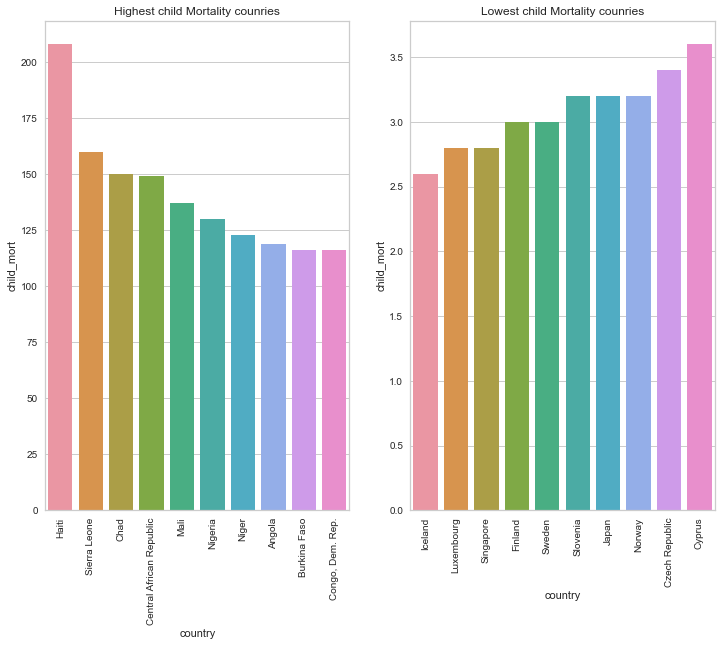

In [18]:
plt.figure(figsize=(12,9))

plt.subplot(1,2,1)
top10_child_mort = df[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
sns.barplot(x='country',y='child_mort',data=top10_child_mort)
plt.xticks(rotation=90)
plt.title('Highest child Mortality counries')

plt.subplot(1,2,2)
bottom10_child_mort = df[['country','child_mort']].sort_values('child_mort',ascending=True).head(10)
sns.barplot(x='country',y='child_mort',data=bottom10_child_mort)
plt.xticks(rotation=90)
plt.title('Lowest child Mortality counries')

plt.show()

## Health Care Rate

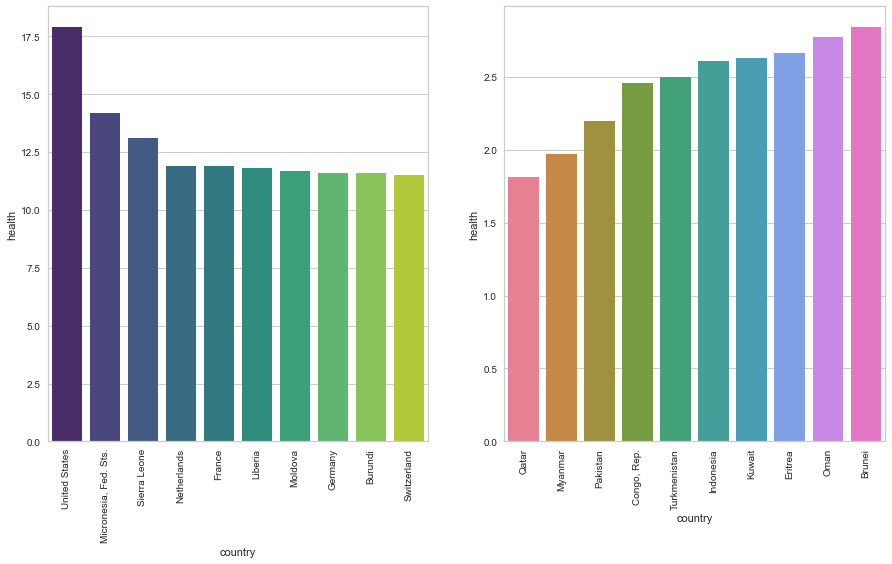

In [19]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Top10_health = df[['country','health']].sort_values('health', ascending=False).head(10)
sns.barplot(x='country',y='health',data=Top10_health,palette='viridis')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
Bottom10_health = df[['country','health']].sort_values('health', ascending=True).head(10)
sns.barplot(x='country',y='health',data=Bottom10_health,palette='husl')
plt.xticks(rotation=90)

plt.show()

## Net Income Rate

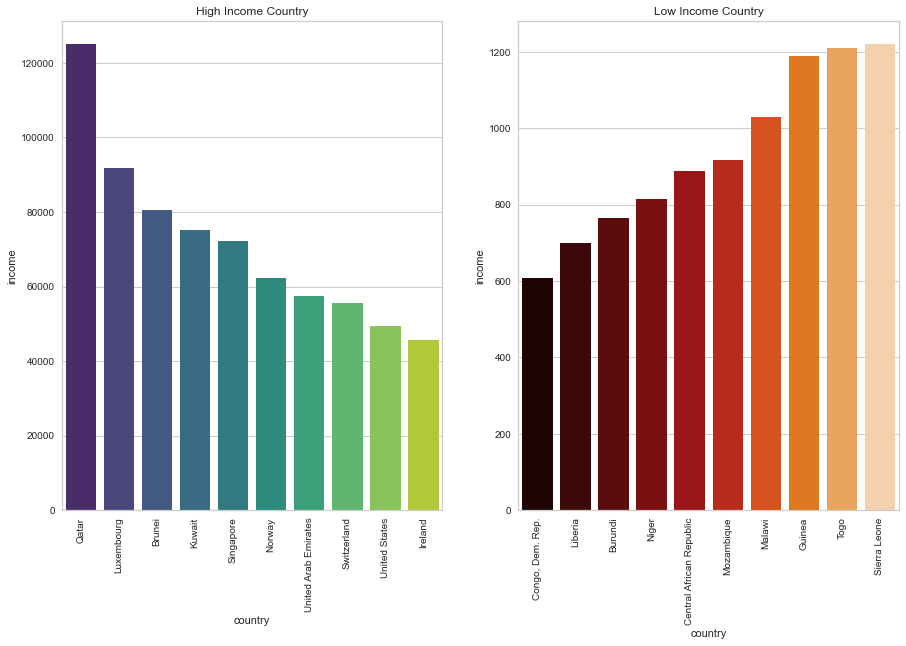

In [20]:
plt.figure(figsize=(15,9))

plt.subplot(1,2,1)
Top10_income = df[['country','income']].sort_values('income', ascending=False).head(10)
sns.barplot(x='country',y='income',data=Top10_income,palette='viridis')
plt.xticks(rotation=90)
plt.title('High Income Country')

plt.subplot(1,2,2)
Bottom10_income = df[['country','income']].sort_values('income', ascending=True).head(10)
sns.barplot(x='country',y='income',data=Bottom10_income,palette='gist_heat')
plt.xticks(rotation=90)
plt.title('Low Income Country')

plt.show()

## Inflation Rate

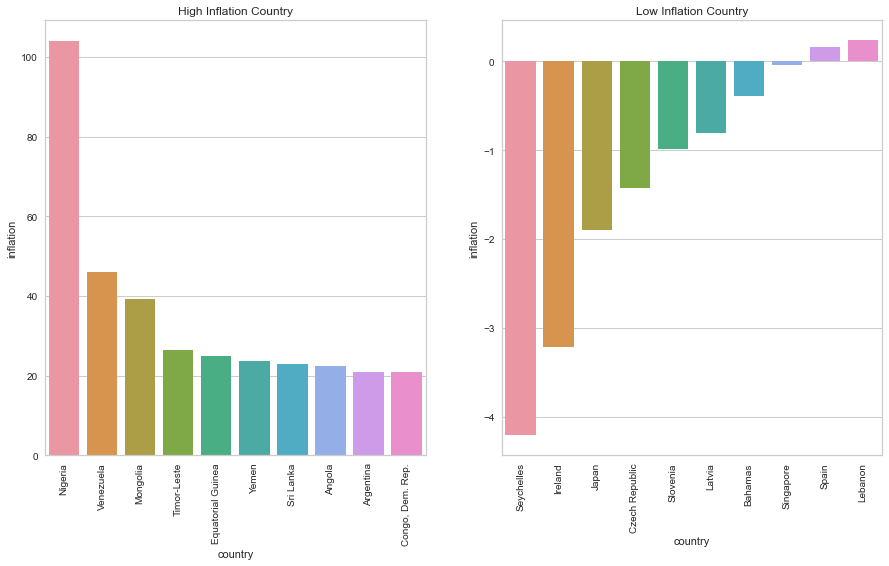

In [21]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Top10_inflation = df[['country','inflation']].sort_values('inflation', ascending=False).head(10)
sns.barplot(x='country',y='inflation',data=Top10_inflation)
plt.xticks(rotation=90)
plt.title('High Inflation Country')

plt.subplot(1,2,2)
Bottom10_inflation = df[['country','inflation']].sort_values('inflation', ascending=True).head(10)
sns.barplot(x='country',y='inflation',data=Bottom10_inflation)
plt.xticks(rotation=90)
plt.title('Low Inflation Country')

plt.show()

In [22]:
## Data Visualization : Import and Export 

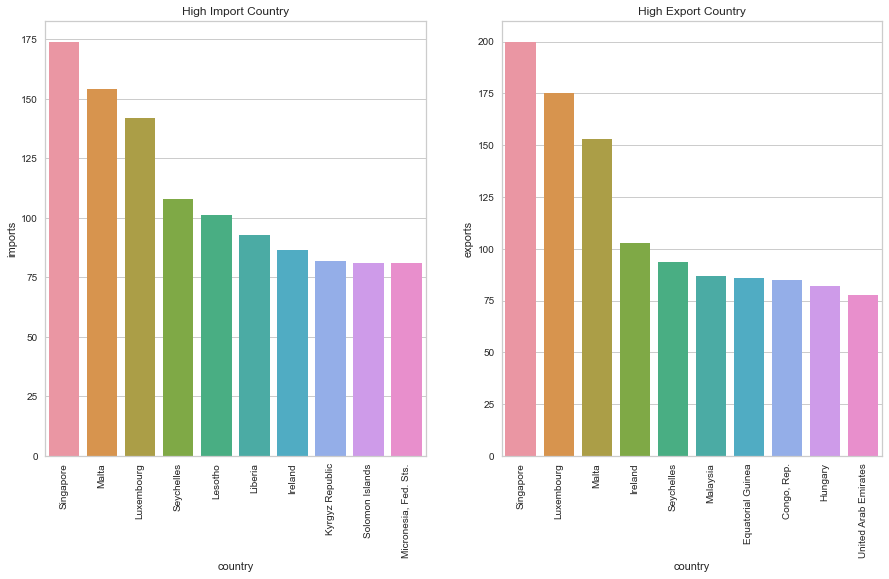

In [23]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Top10_import = df[['country','imports']].sort_values('imports', ascending=False).head(10)
sns.barplot(x='country',y='imports',data=Top10_import)
plt.xticks(rotation=90)
plt.title('High Import Country')

plt.subplot(1,2,2)
Top10_export = df[['country','exports']].sort_values('exports', ascending=False).head(10)
sns.barplot(x='country',y='exports',data=Top10_export)
plt.xticks(rotation=90)
plt.title('High Export Country')

plt.show()

## Data Visualization : GDPP

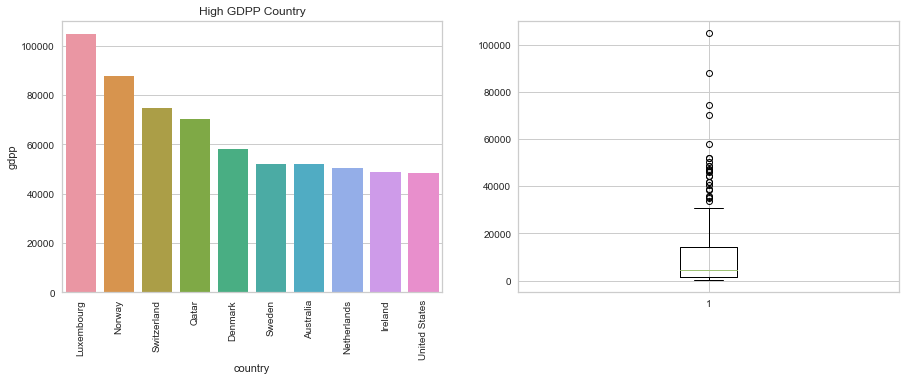

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
Top10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending=False).head(10)
sns.barplot(x='country',y='gdpp',data=Top10_gdpp)
plt.xticks(rotation=90)
plt.title('High GDPP Country')

plt.subplot(1,2,2)
plt.boxplot('gdpp',data=df)

plt.show()

In [25]:
df['child_mort'].quantile(0.05)

3.46

In [26]:
df['child_mort'].quantile([0.05,0.95]).values

array([  3.46, 116.  ])

In [27]:
percentiles = df['child_mort'].quantile([0.05,0.95]).values

In [28]:
df['child_mort'][df['child_mort'] <= percentiles[0]] = percentiles[0]
df['child_mort'][df['child_mort'] >= percentiles[1]] = percentiles[1]

In [29]:
percentiles[0]

3.46

In [30]:
percentiles[1]

116.0

## Data Visualization using Box Plots

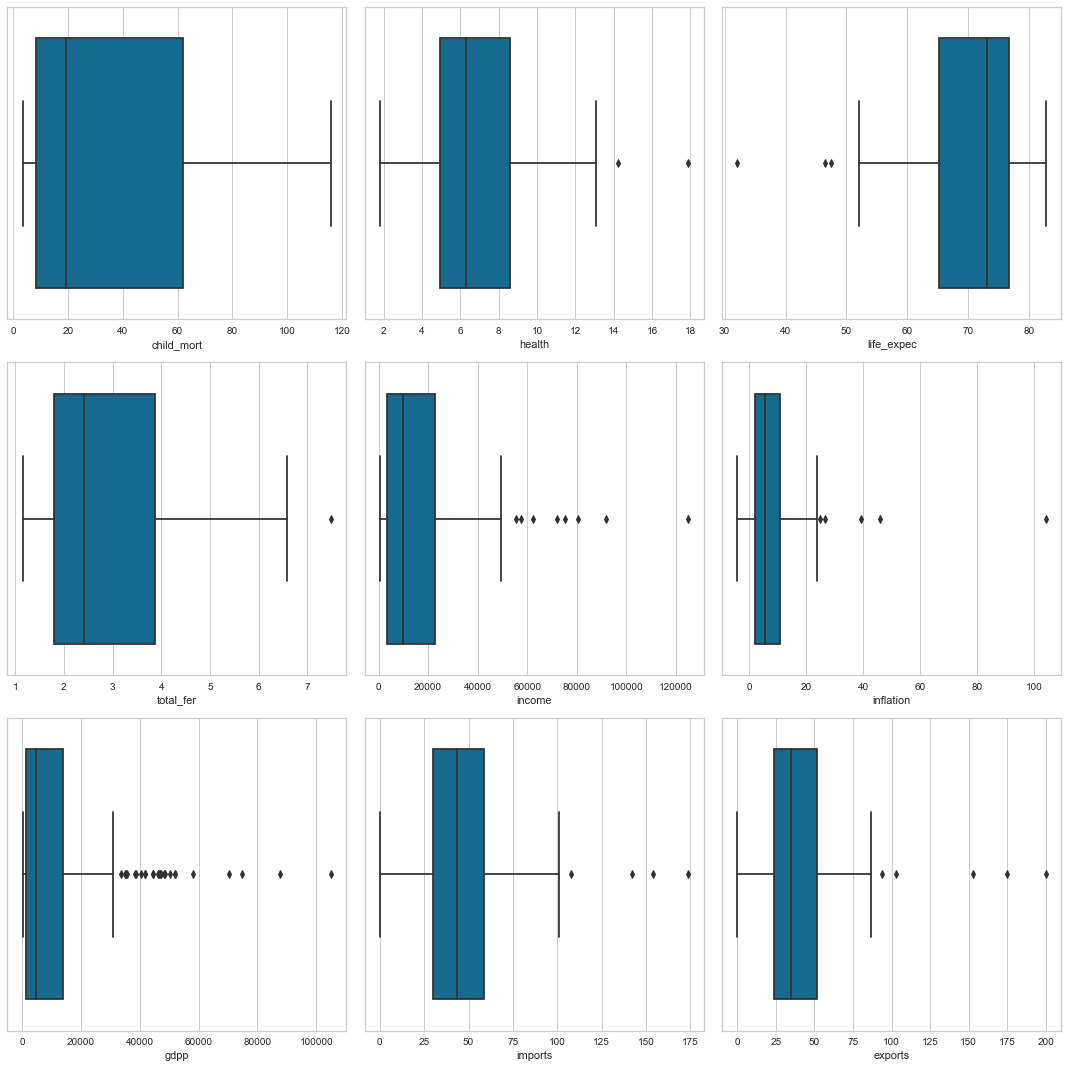

In [31]:
fig, axs = plt.subplots(3,3, figsize = (15,15))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])


plt.tight_layout()

In [32]:
# checking for outliers using the Z-score



z = np.abs(stats.zscore(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

[[1.47958789 1.13827979 0.27908825 ... 1.61909203 1.90288227 0.67917961]
 [0.56002364 0.47965843 0.09701618 ... 0.64786643 0.85997281 0.48562324]
 [0.26350403 0.09912164 0.96607302 ... 0.67042323 0.0384044  0.46537561]
 ...
 [0.37435248 1.13030491 0.0088773  ... 0.28695762 0.66120626 0.63775406]
 [0.54014725 0.40647827 0.59727159 ... 0.34463279 1.14094382 0.63775406]
 [1.28283189 0.15034774 0.33801514 ... 2.09278484 1.6246091  0.62954556]]


*******************************************************************************


Below are the outlier points along with the respective column numbers in the second array


(array([ 23,  66,  82,  91,  91,  91,  91,  98,  98, 112, 113, 114, 123,
       123, 133, 133, 145, 159, 163], dtype=int64), array([4, 6, 4, 1, 3, 4, 8, 1, 3, 7, 5, 8, 4, 8, 1, 3, 8, 2, 5],
      dtype=int64))


In [33]:
# Removing the outliers

df_outliers_removed = df[(z<3).all(axis=1)]

## Data Visualization : With Outliers Removed

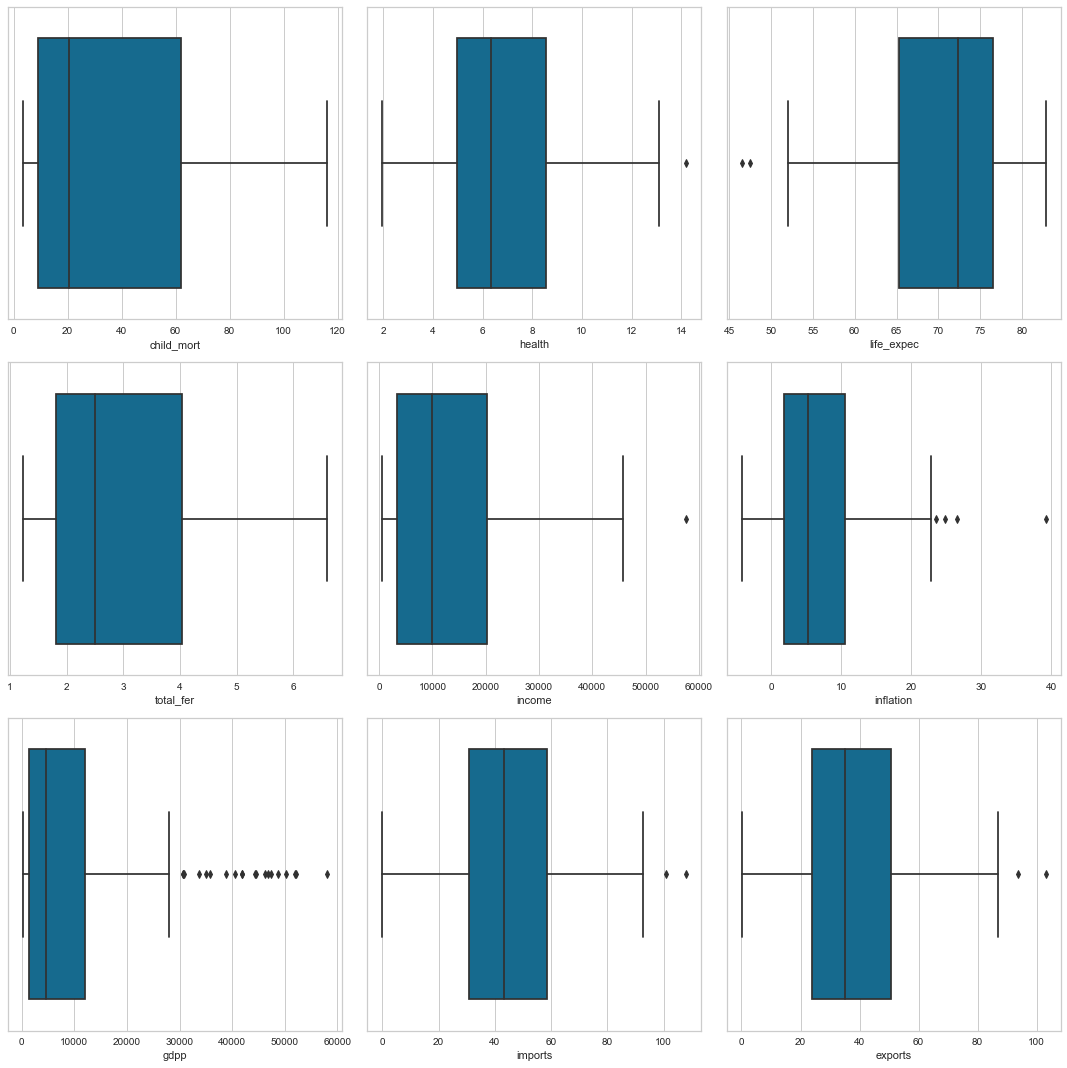

In [34]:
fig, axs = plt.subplots(3,3, figsize = (15,15))
plt1 = sns.boxplot(df_outliers_removed['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df_outliers_removed['health'], ax = axs[0,1])
plt3 = sns.boxplot(df_outliers_removed['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df_outliers_removed['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df_outliers_removed['income'], ax = axs[1,1])
plt6 = sns.boxplot(df_outliers_removed['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df_outliers_removed['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df_outliers_removed['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df_outliers_removed['exports'], ax = axs[2,2])


plt.tight_layout()

In [35]:
df_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,116.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [36]:
print('Shape of dataframe before outlier removal: ' + str(df.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(df_outliers_removed.shape))

Shape of dataframe before outlier removal: (167, 10)


Shape of dataframe after outlier removal: (154, 10)


In [37]:
X = df_outliers_removed.drop('country',axis =1)  
y = df_outliers_removed['country']

In [38]:
X.shape

(154, 9)

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_scaled

array([[ 1.51025334, -1.40559755,  0.29689715, ..., -1.71200139,
         1.92634313, -0.71838198],
       [-0.58542762, -0.51874061, -0.10325432, ...,  0.71866053,
        -0.89310037, -0.46353102],
       [-0.28075661, -0.00633437, -1.02787615, ...,  0.74284622,
        -0.0547047 , -0.43687146],
       ...,
       [-0.39465231,  1.64913192,  0.00940969, ...,  0.33168947,
        -0.69026271, -0.66383797],
       [ 0.54498725, -0.42020095, -0.63549462, ..., -0.34550987,
         1.14879876, -0.66383797],
       [ 1.30808846, -0.07531213, -0.35966205, ..., -2.2199009 ,
         1.6423704 , -0.65303004]])

In [41]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [42]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [43]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.510253,-1.405598,0.296897,-0.040061,-0.948300,0.337992,-1.712001,1.926343,-0.718382
1,-0.585428,-0.518741,-0.103254,0.154266,-0.325574,-0.374018,0.718661,-0.893100,-0.463531
2,-0.280757,-0.006334,-1.027876,-0.749093,-0.103278,1.295969,0.742846,-0.054705,-0.436871
3,2.244881,1.171215,-1.540692,-0.145103,-0.627207,2.202163,-1.240380,2.156226,-0.503881
4,-0.764813,0.343481,-0.305273,0.695232,0.360772,-0.812731,0.779125,-0.568560,0.120818


In [44]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_scaled_df)

PCA(random_state=42, svd_solver='randomized')

In [45]:
pca.components_

array([[-0.42684024,  0.20935123,  0.19395482,  0.08547993,  0.41450203,
        -0.2314683 ,  0.42771241, -0.4067264 ,  0.39408173],
       [ 0.02999855,  0.63075408, -0.15653311,  0.72049796, -0.07783842,
        -0.05915266, -0.13841757,  0.01459588, -0.16940816],
       [ 0.18866389, -0.22265258,  0.69662497,  0.27212415, -0.09896723,
        -0.51452164, -0.1894399 ,  0.17946236,  0.11345756],
       [ 0.3186745 ,  0.289832  ,  0.16340988, -0.07900939,  0.45517289,
         0.39290924, -0.1773358 ,  0.39611963,  0.48122752],
       [-0.2306507 , -0.08433396,  0.54672251,  0.21493645, -0.15930703,
         0.70258194,  0.08746181, -0.16285718, -0.20350115],
       [ 0.0676005 ,  0.34383635,  0.20677075, -0.39286741,  0.03208731,
        -0.06190568, -0.59191176, -0.55562921, -0.12713195],
       [-0.00803751, -0.53384146, -0.2805795 ,  0.4293093 ,  0.24849414,
         0.13037455, -0.43740921, -0.33412476,  0.26496099],
       [ 0.77685541, -0.01378869,  0.00489322,  0.08004957, -0

In [46]:
colnames = list(X_scaled_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.426840,0.029999,child_mort
1,0.209351,0.630754,exports
2,0.193955,-0.156533,health
3,0.085480,0.720498,imports
4,0.414502,-0.077838,income


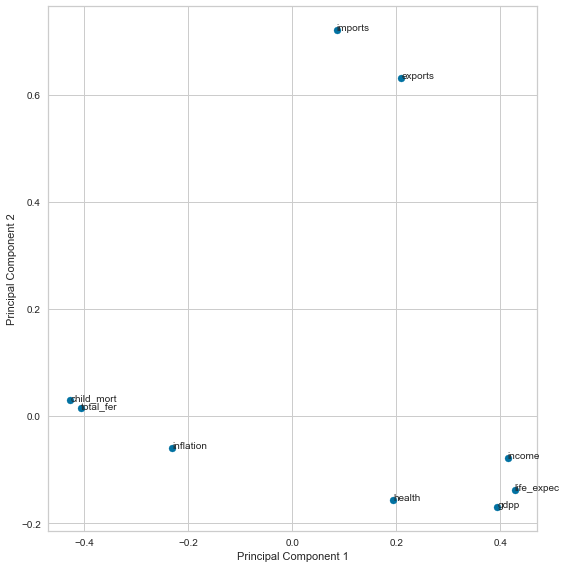

In [47]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

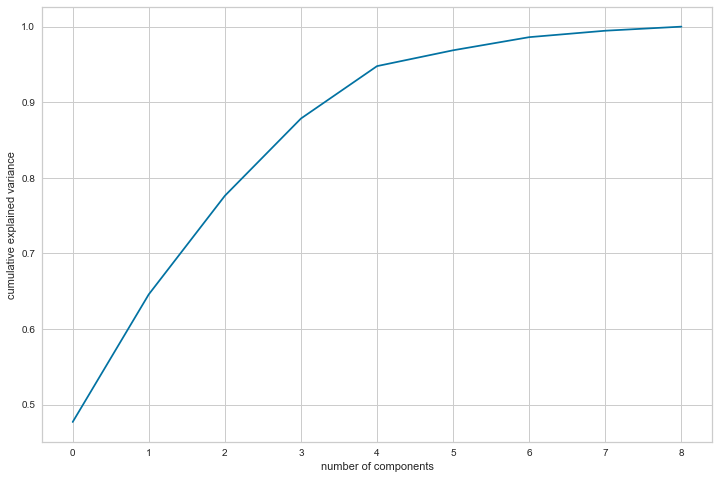

In [48]:
#Making the screen plot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

## Based on the visual interpretation above, we notice that 4 components are sufficient to Best Describe 95% of the variance in the dataset

### Passing 4 Components to our Model

In [49]:
#Using incremental PCA for better efficiency
pca_final = IncrementalPCA(n_components=4)

In [50]:
df_pca = pca_final.fit_transform(X_scaled_df)
df_pca.shape

(154, 4)

In [51]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,3.153492,-0.522836,1.303384,0.504423
1,-0.574989,-0.210541,-0.226007,-1.353318
2,0.320667,-0.420506,-1.882652,-0.025075
3,3.402623,1.228886,-1.303788,2.260647
4,-1.347331,0.628841,-0.063370,-0.719165


## Get Correlations of each features in dataset

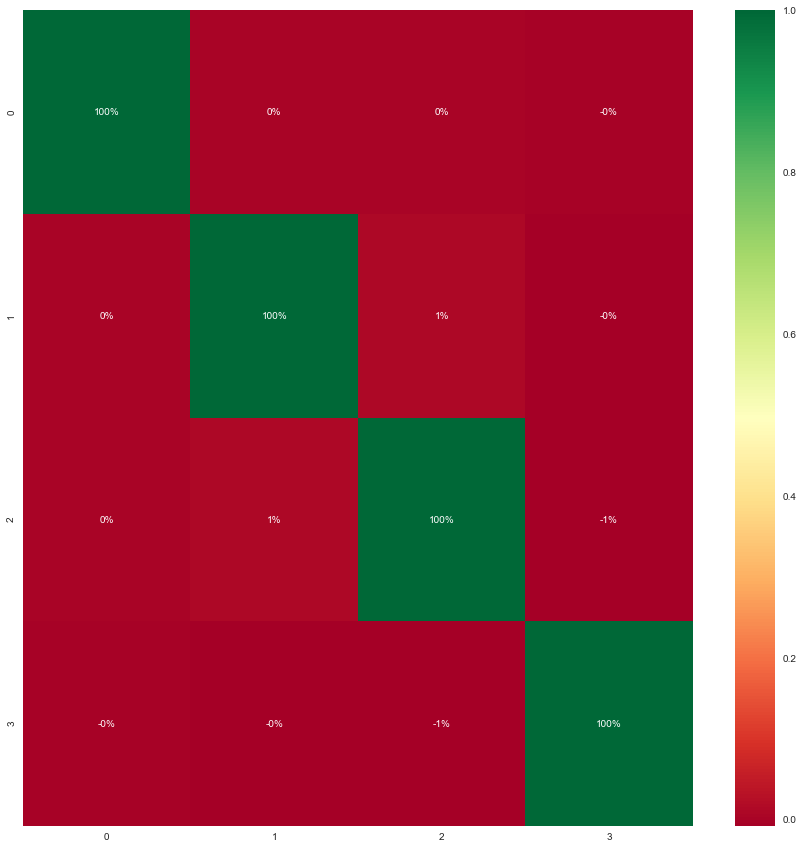

In [52]:
corrmat = np.corrcoef(df_pca.transpose())
#plot heat map
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True, fmt ='.0%',cmap="RdYlGn")
plt.show()

# 3. Experiments with different clustering settings

## Hopkins Test

In [53]:

 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [54]:
hopkins(df_pca)

0.625000538117907

## Conclusion : 
### 0.01 - 0.3 : Low chase of clustering
### around 0.5 : Random
### 0.7 - 0.99 : High chance of clustering
### As we got the Hopkins score is > 0.5, there is a high clusterablity using Hopkins Test

## Finding the Silhouette Coefficient for various cluster sizes using KMeans

For n_clusters=2, the silhouette score is 0.3215725098981662
For n_clusters=3, the silhouette score is 0.32352119318569983
For n_clusters=4, the silhouette score is 0.30726278443995014
For n_clusters=5, the silhouette score is 0.30083699158797716
For n_clusters=6, the silhouette score is 0.3071670577484374
For n_clusters=7, the silhouette score is 0.29085229951358615
For n_clusters=8, the silhouette score is 0.2927161008625742
For n_clusters=9, the silhouette score is 0.3049053800975838


Text(0.5, 1.0, 'Measuring Clustering Quality')

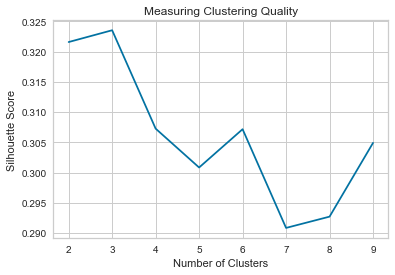

In [55]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    ss.append([k,silhouette_score(df_pca,kmeans.labels_)])
    silhouette_avg = silhouette_score(df_pca,kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(k,silhouette_avg))
    
temp = pd.DataFrame(ss)
plt.plot(temp[0],temp[1])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title("Measuring Clustering Quality")

## Observation : Based on the plot above, better number of clusters is 3 

## Installing yellowbrick package for visual representation of Silhouetter Score

In [56]:
#!pip install yellowbrick

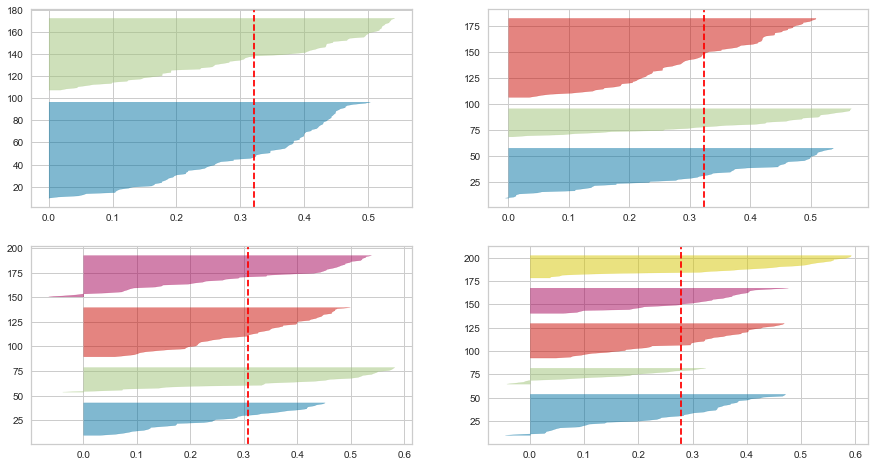

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2,6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100,algorithm='full', random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca)

# Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

## A). The value of n_clusters as 2,3 and 5 looks to be suboptimal for the given data due to the following reasons:Wide fluctuations in the size of the silhouette plots.
## B). The value of 4 for n_clusters looks to be the Optimal one. The silhouette score for each cluster is above average silhouette scores.Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. 

# Perform Agglomerative clustering for different linkage methods (Ward, Complete, Average) and different distance measures (Euclidean, Manhattan / Cityblock, Cosine)

In [58]:
df_pca.head()

,0,1,2,3
0,3.153492,-0.522836,1.303384,0.504423
1,-0.574989,-0.210541,-0.226007,-1.353318
2,0.320667,-0.420506,-1.882652,-0.025075
3,3.402623,1.228886,-1.303788,2.260647
4,-1.347331,0.628841,-0.063370,-0.719165


## Plot A ( Using euclidean distance metric)

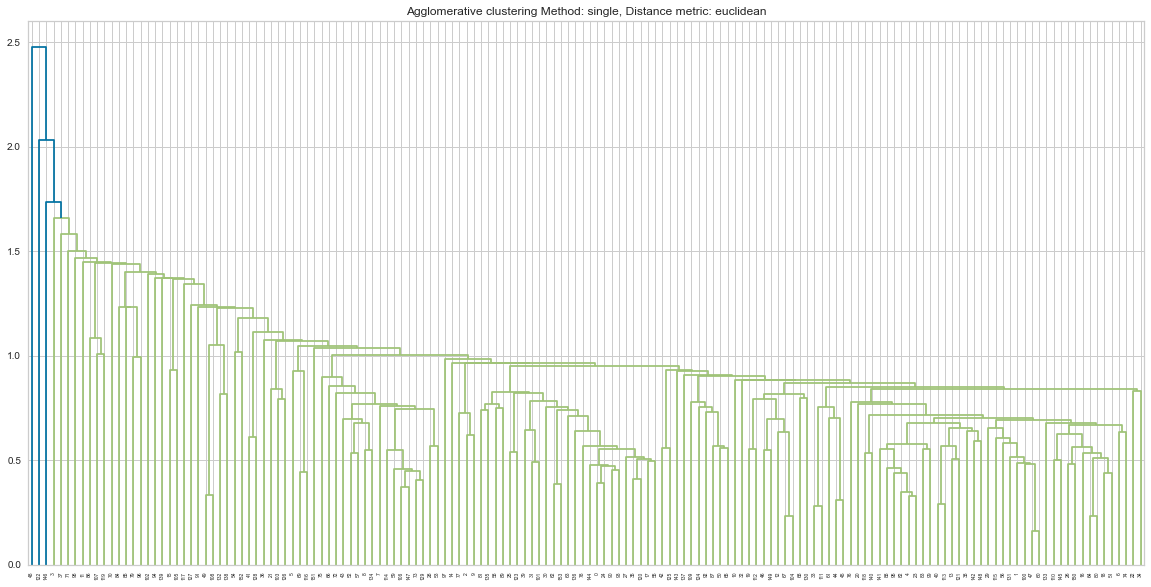

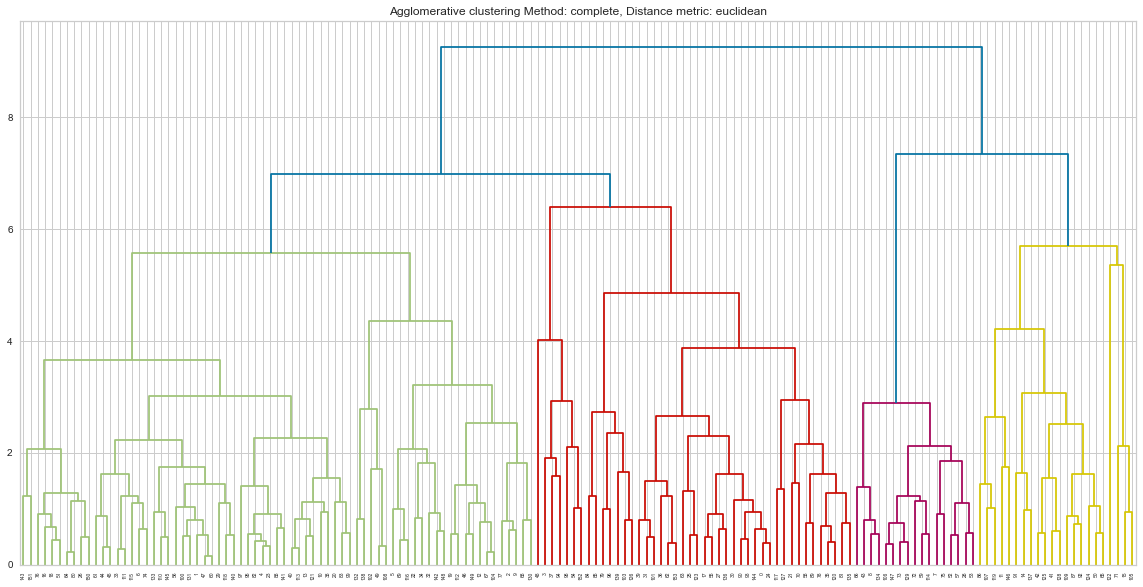

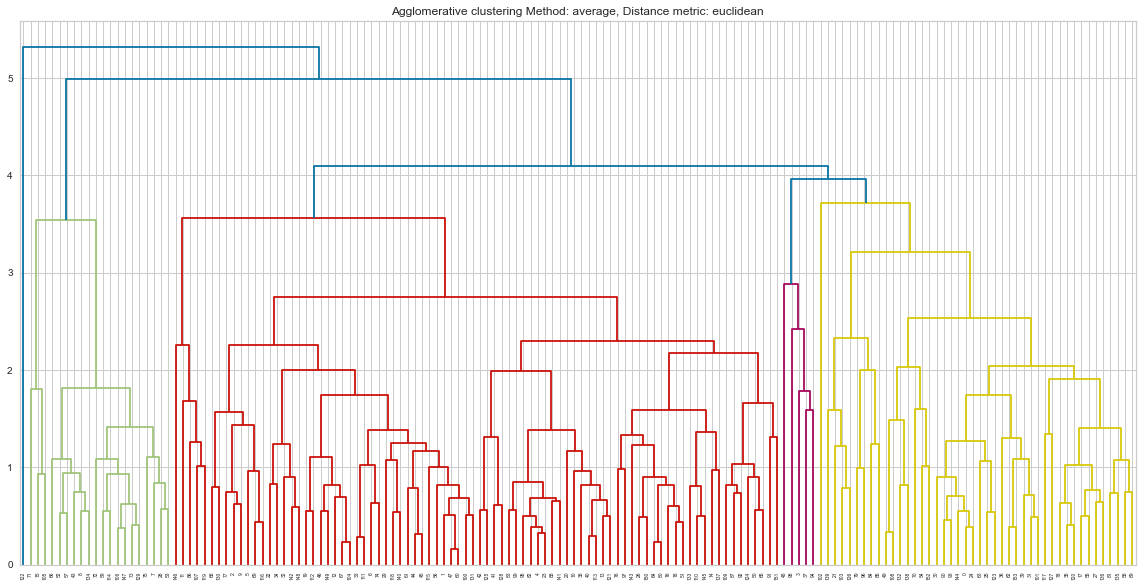

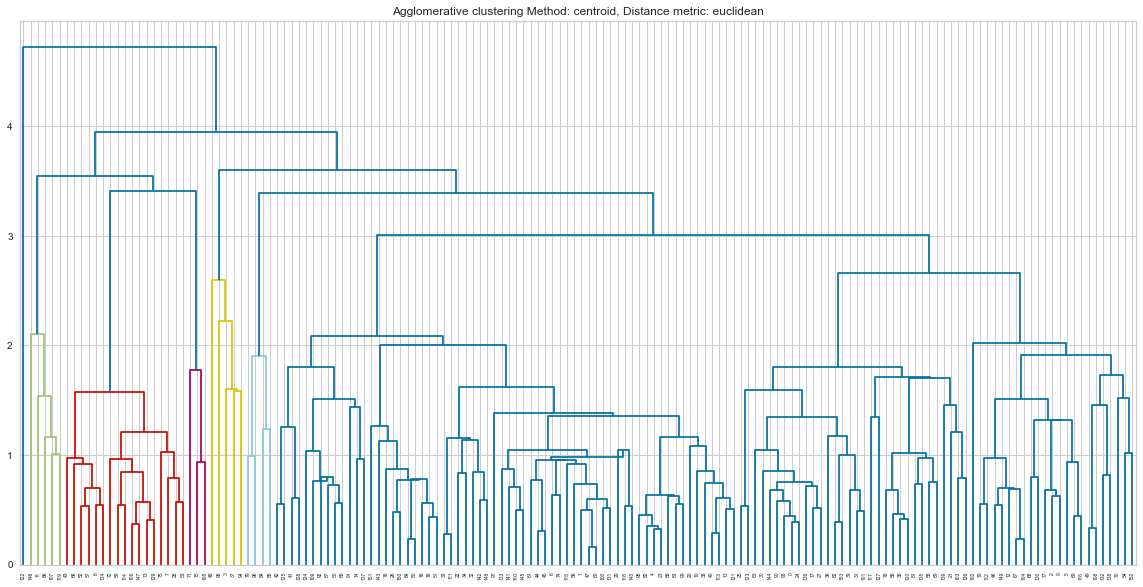

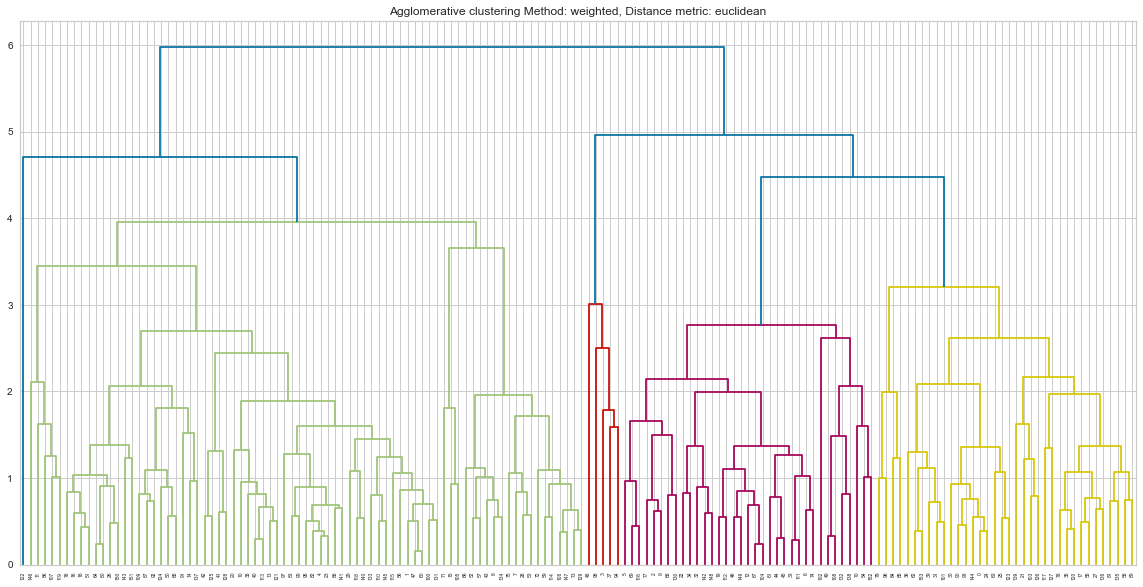

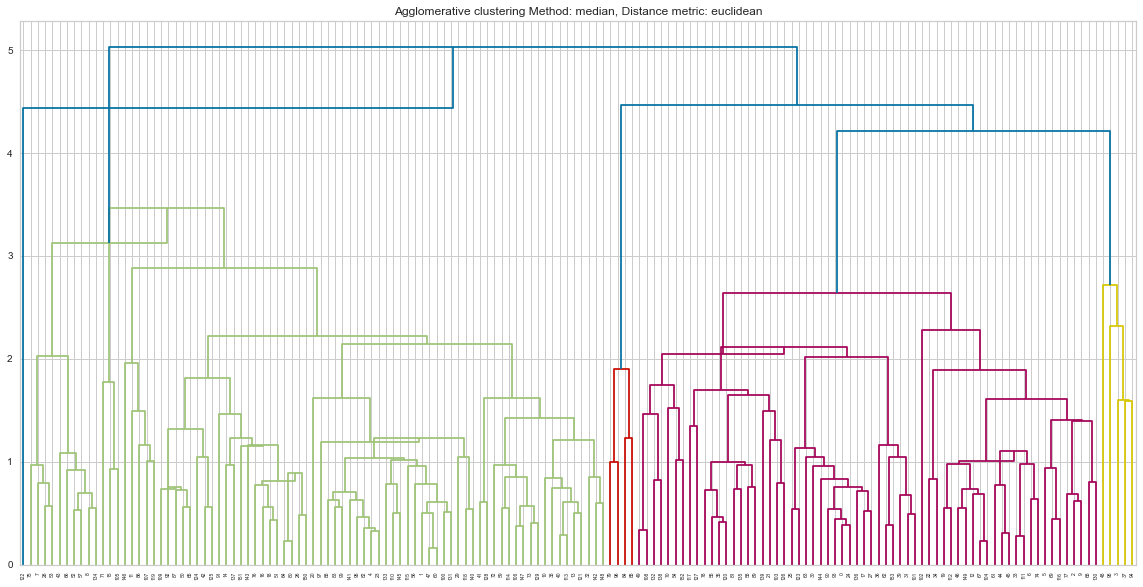

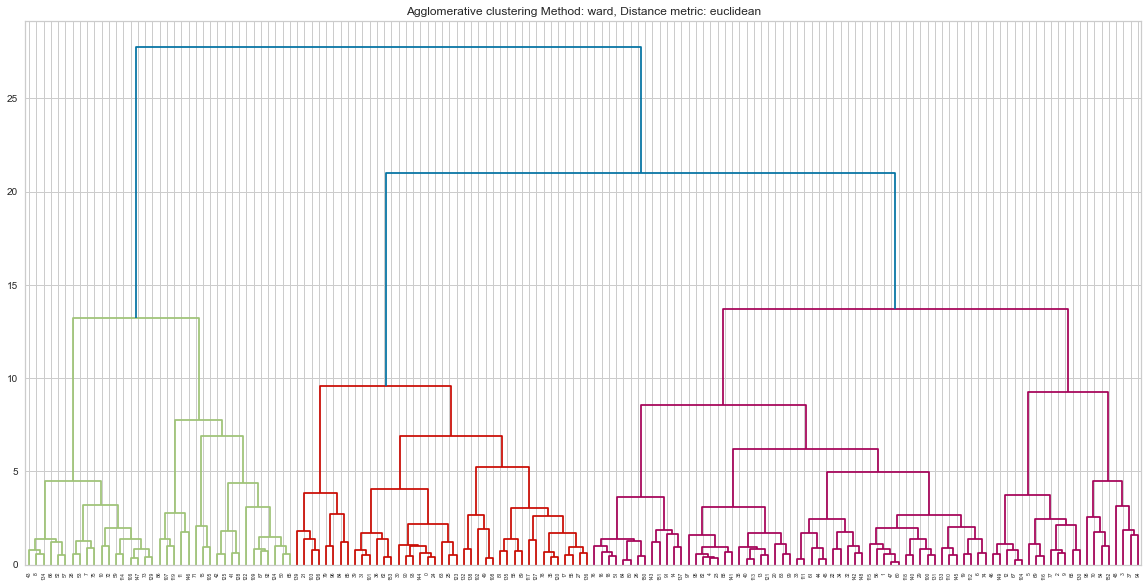

In [59]:
linkageMethods = ["single", "complete", "average", "centroid", "weighted", "median", "ward"]
distanceMetric = ["euclidean"]

for method in linkageMethods:
    for metric in distanceMetric:
        mergings = linkage(df_pca, method=method, metric=metric)
        plt.figure(figsize = (20,10))
        plt.title("Agglomerative clustering Method: "+ method + ", Distance metric: "+ metric)
        dendrogram(mergings)
        plt.show()

## Plot B ( Using other distance metric)

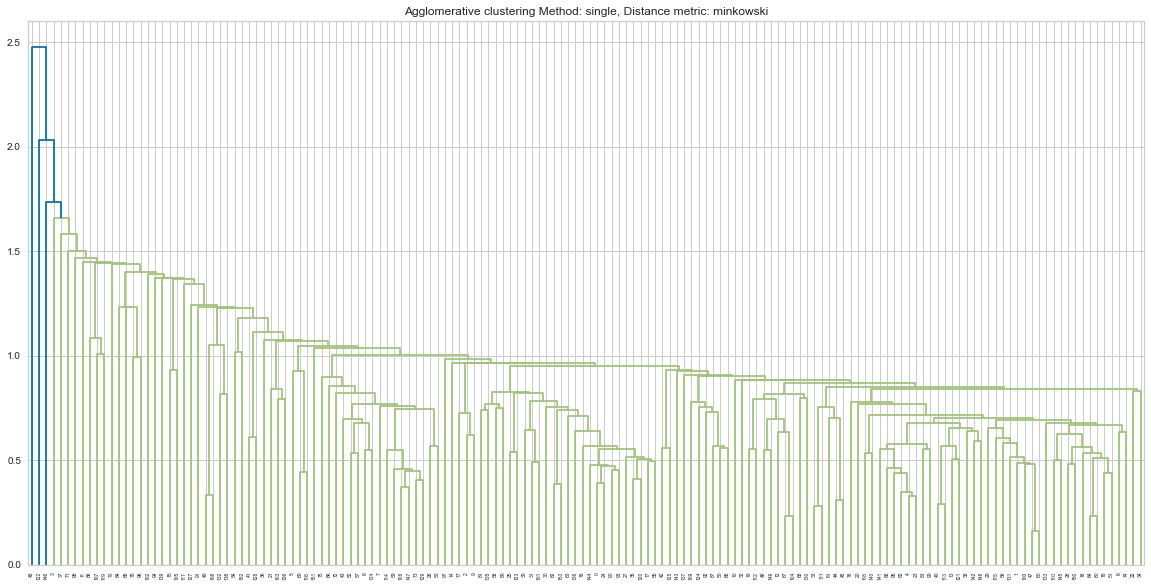

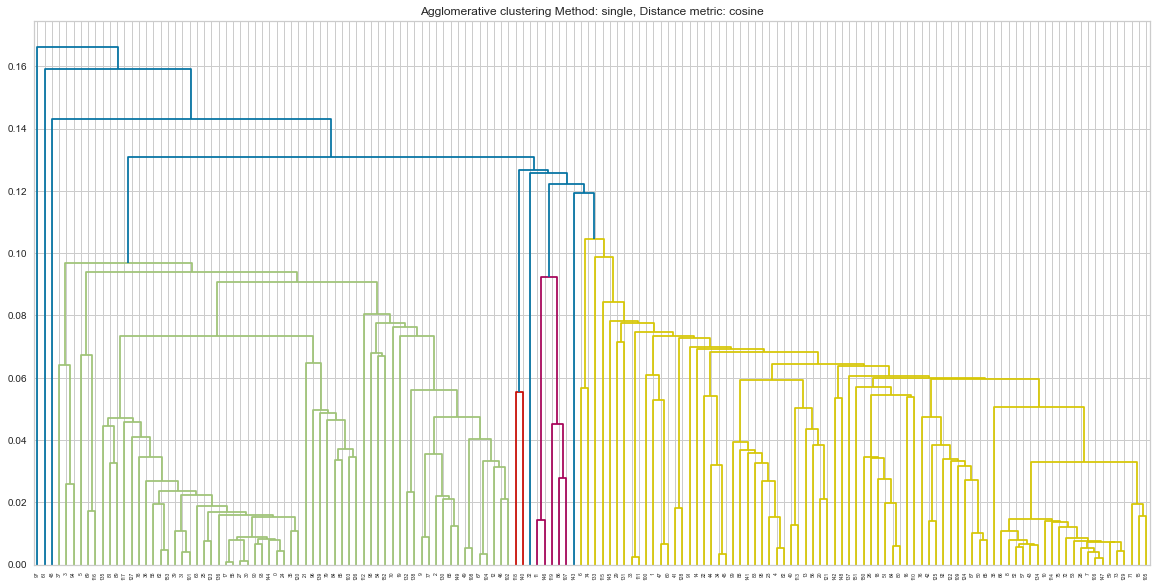

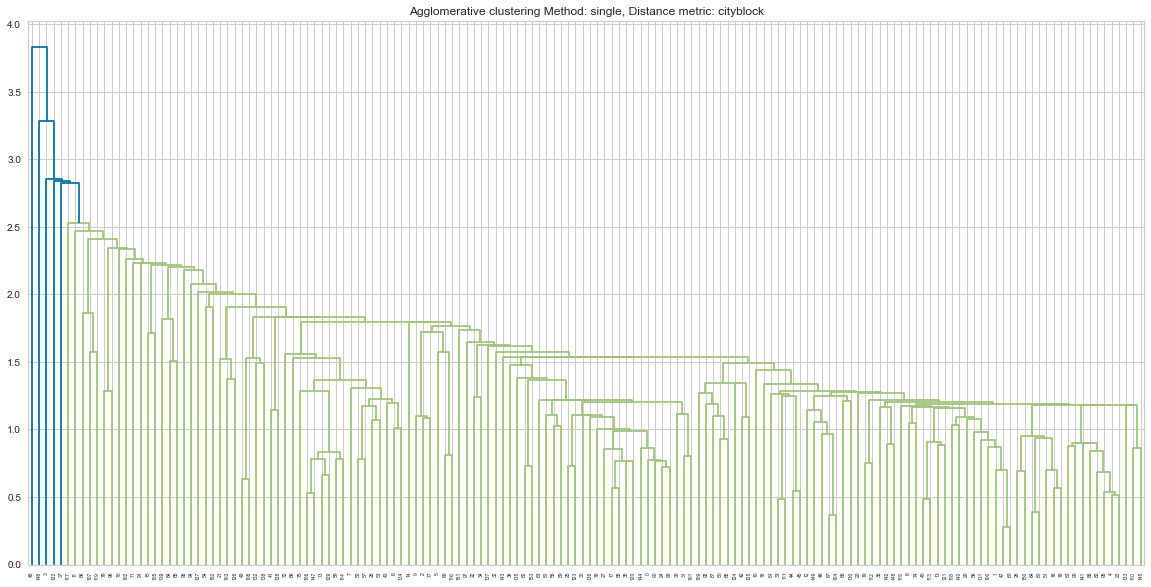

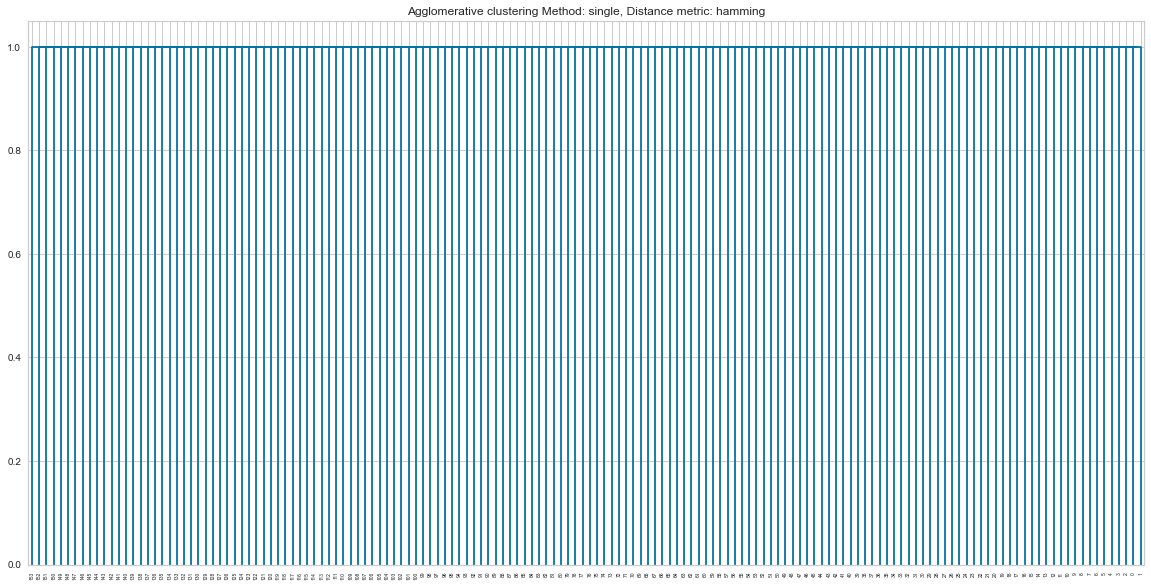

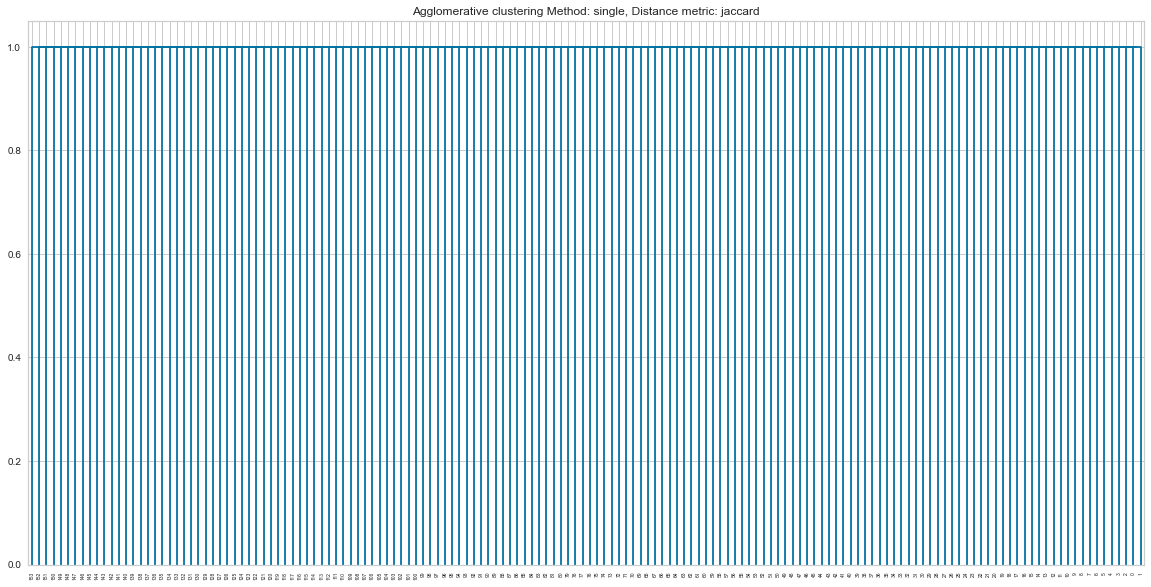

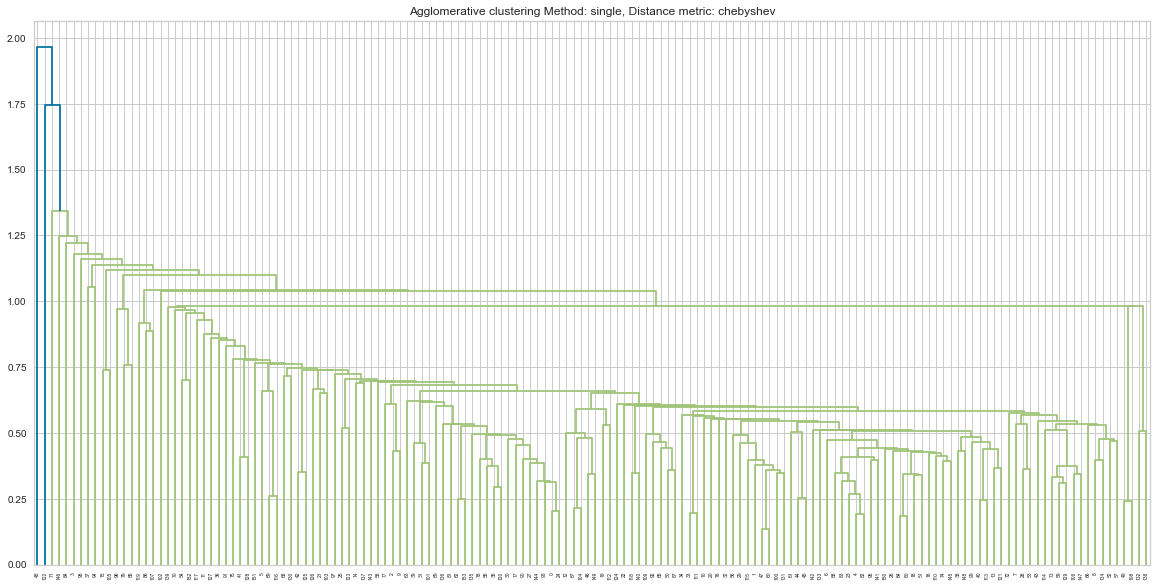

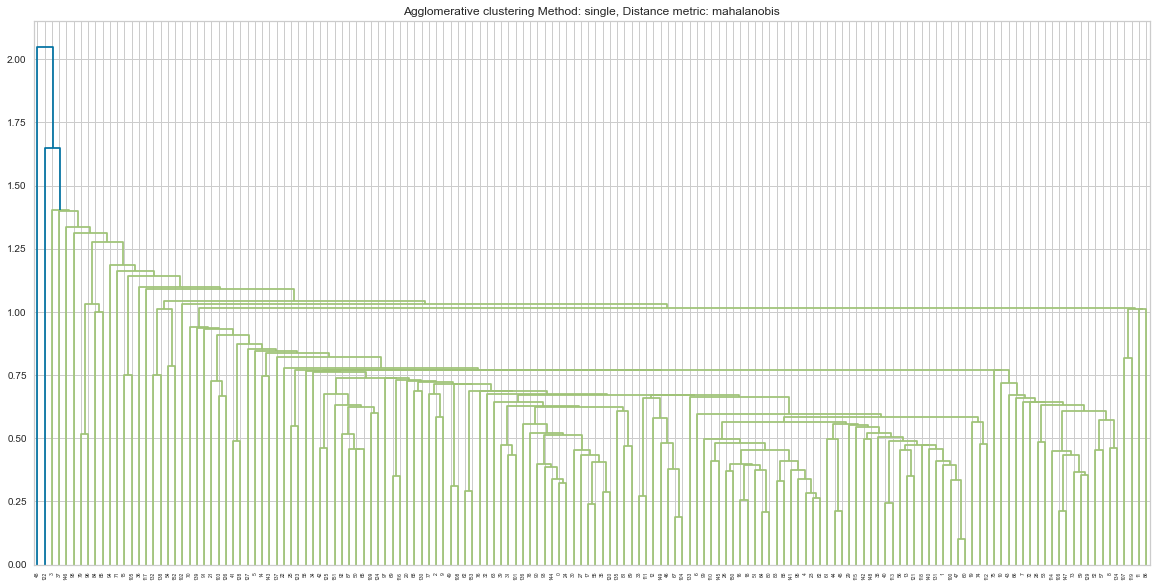

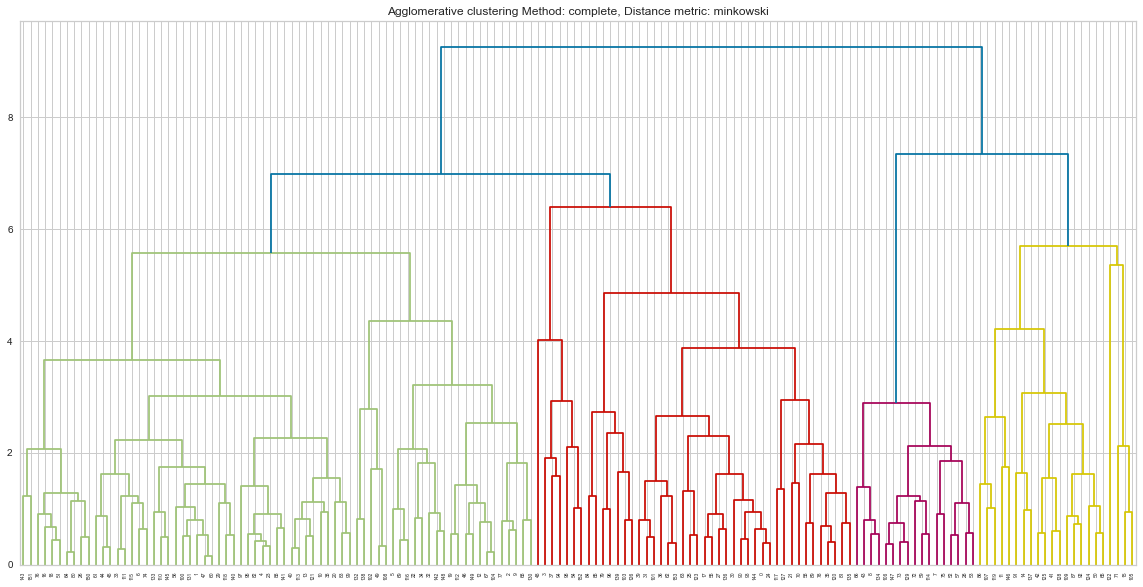

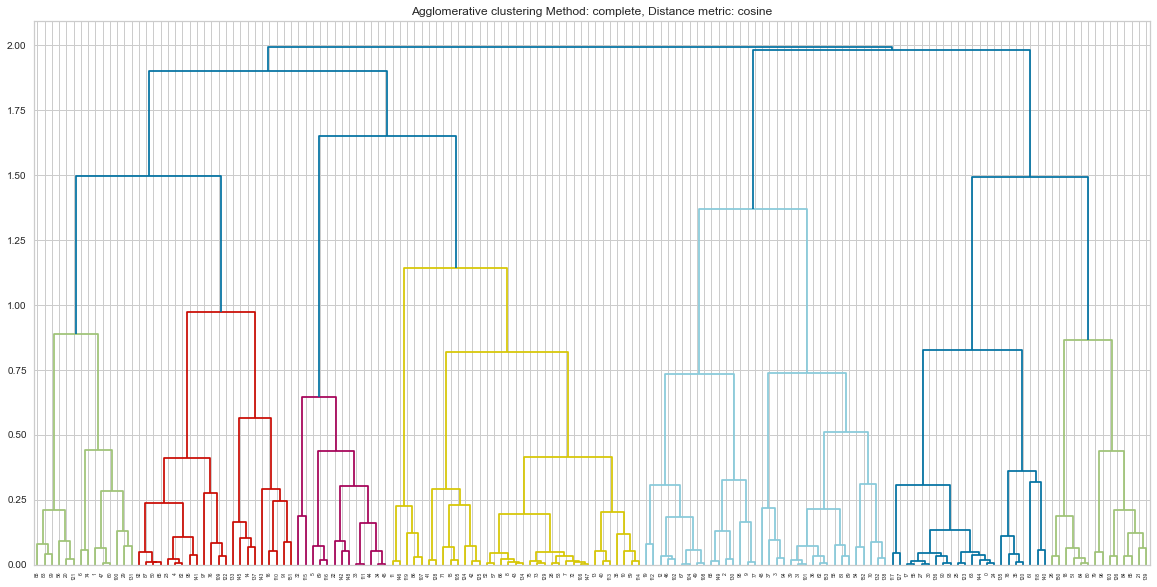

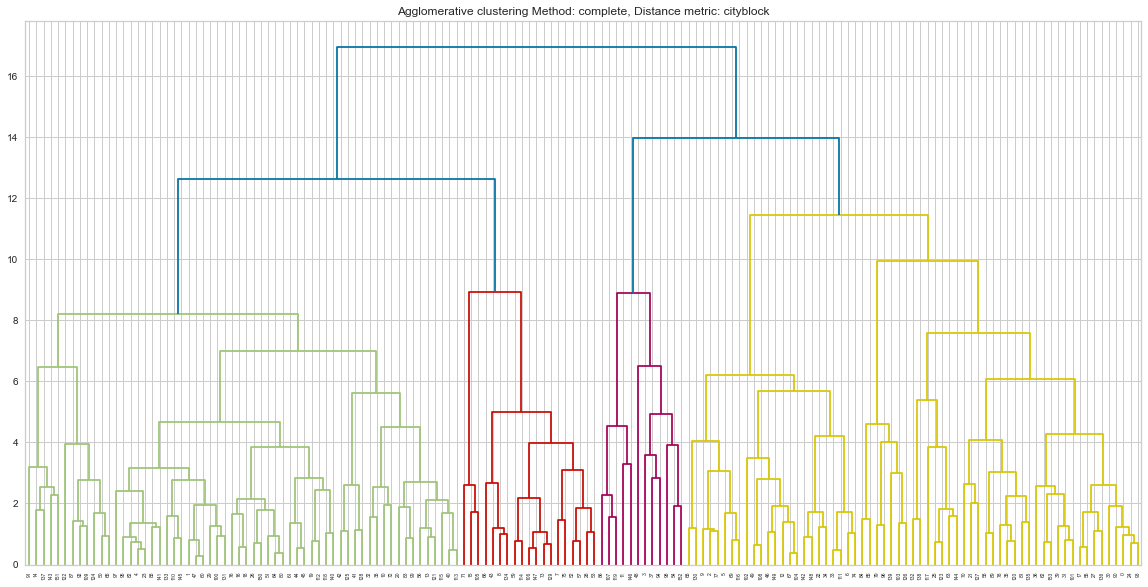

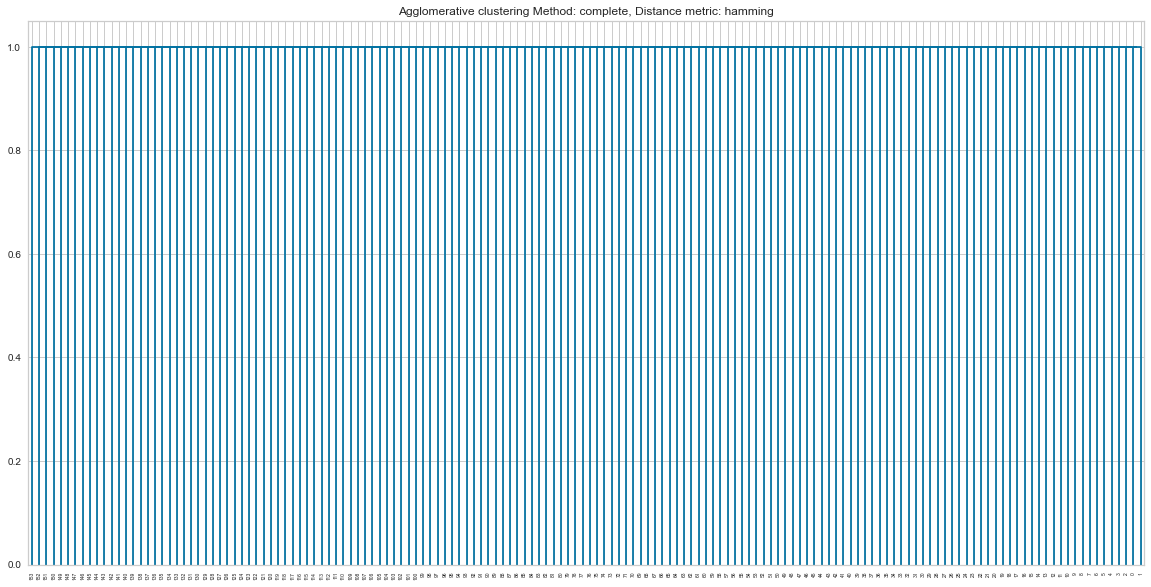

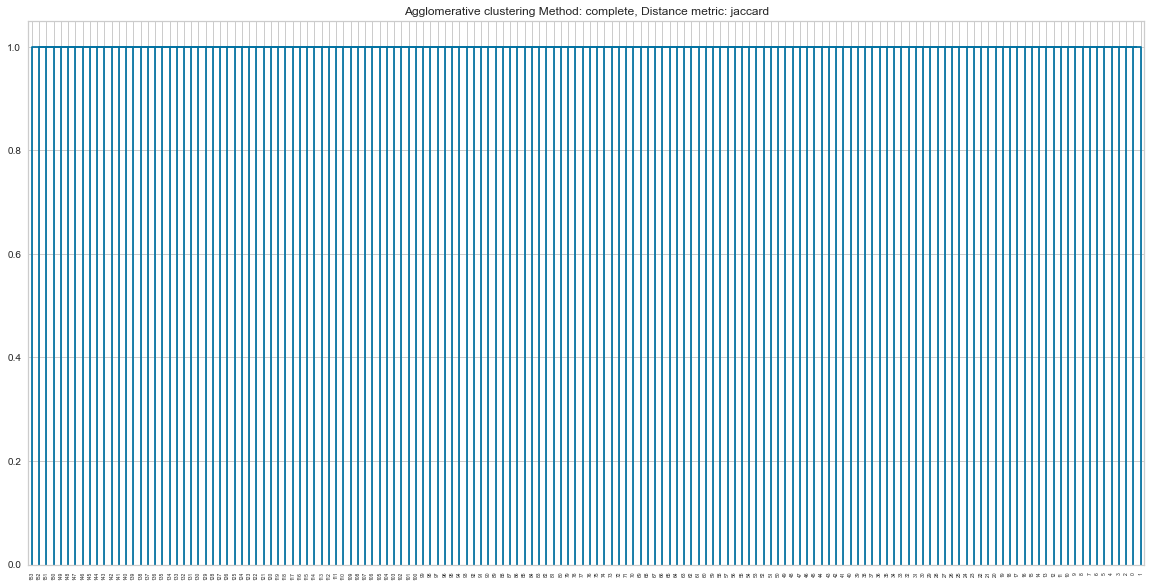

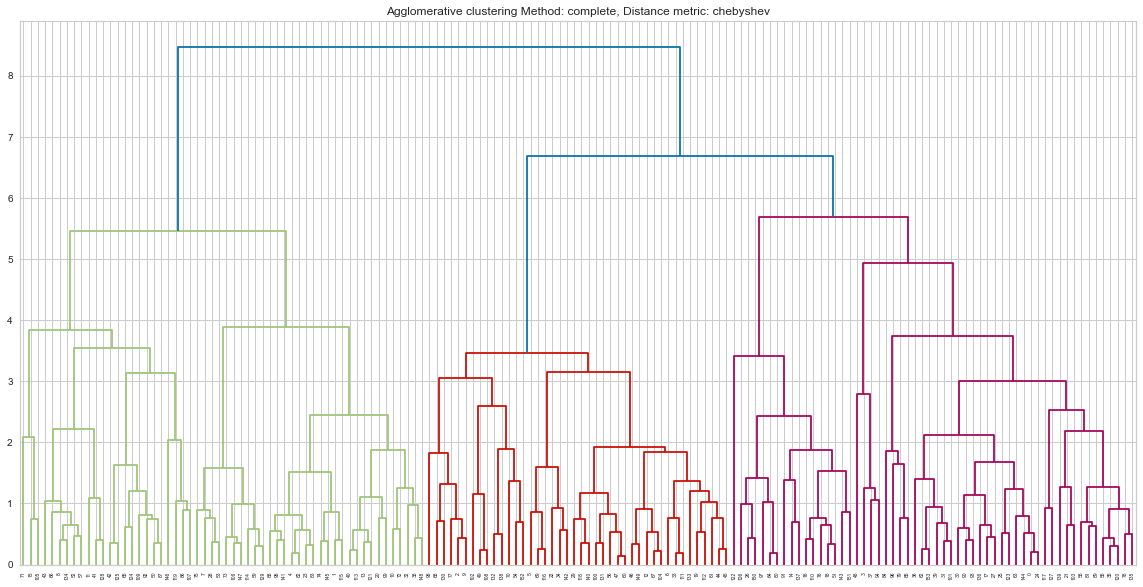

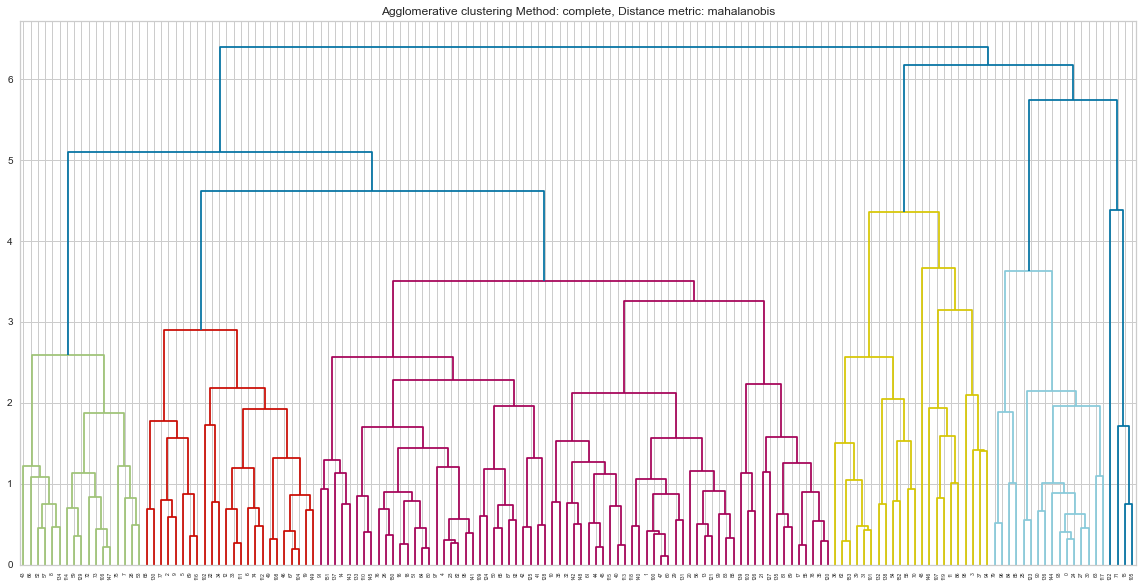

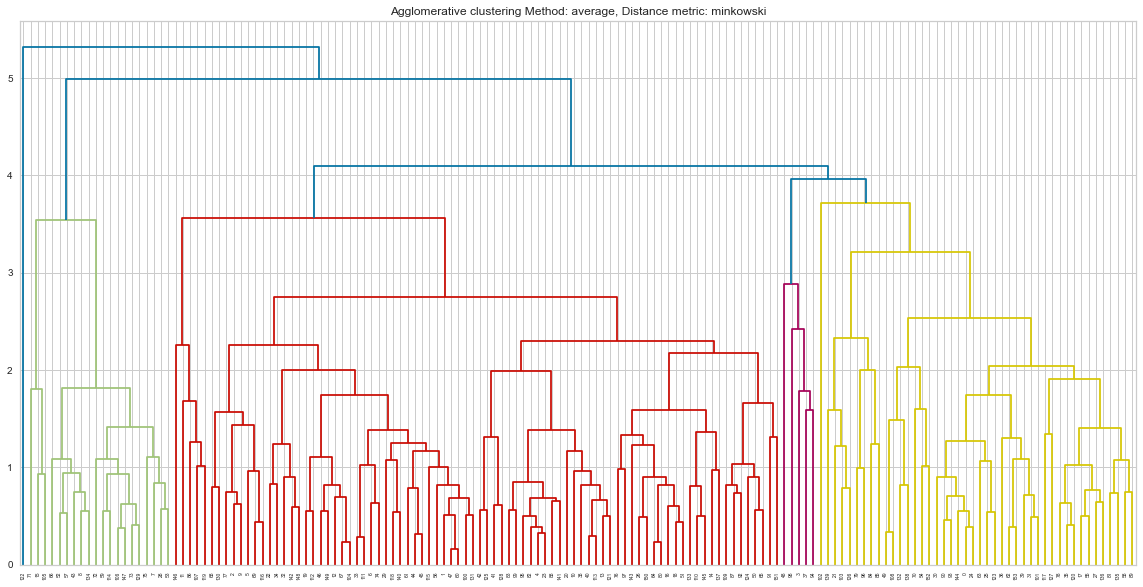

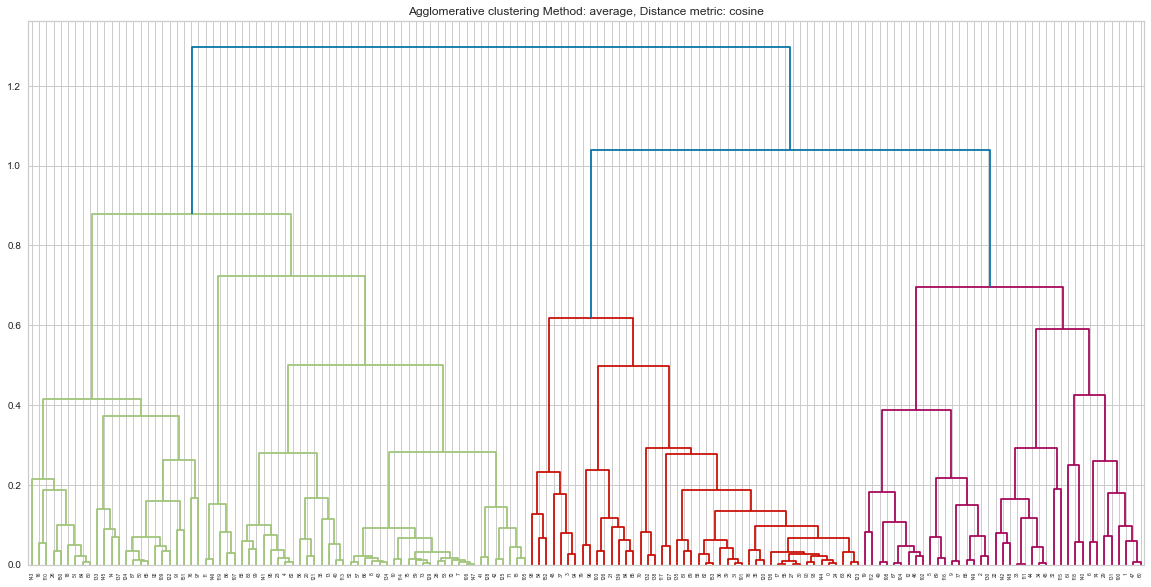

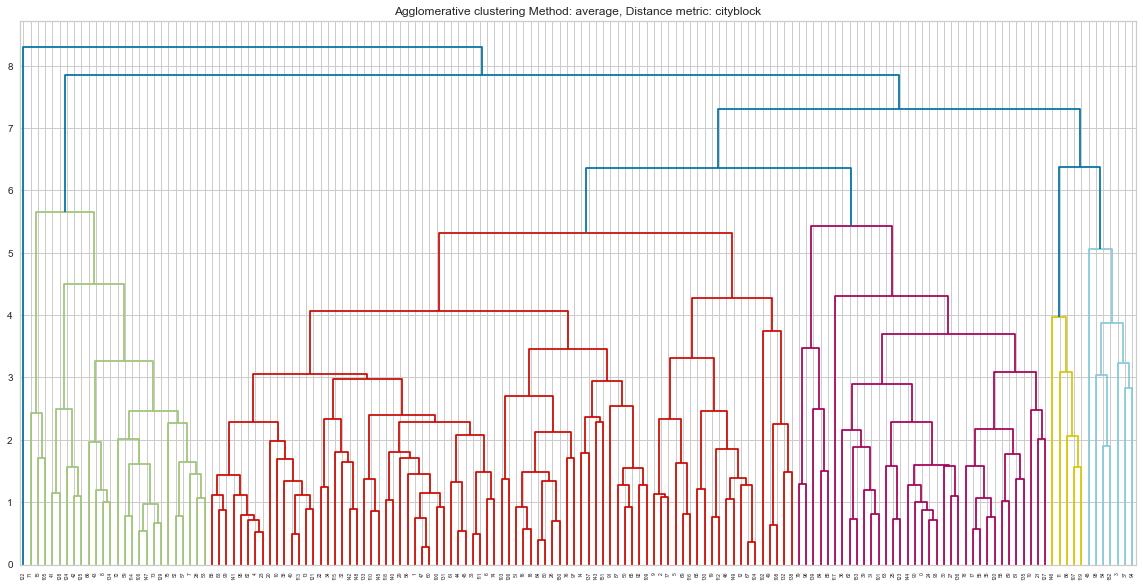

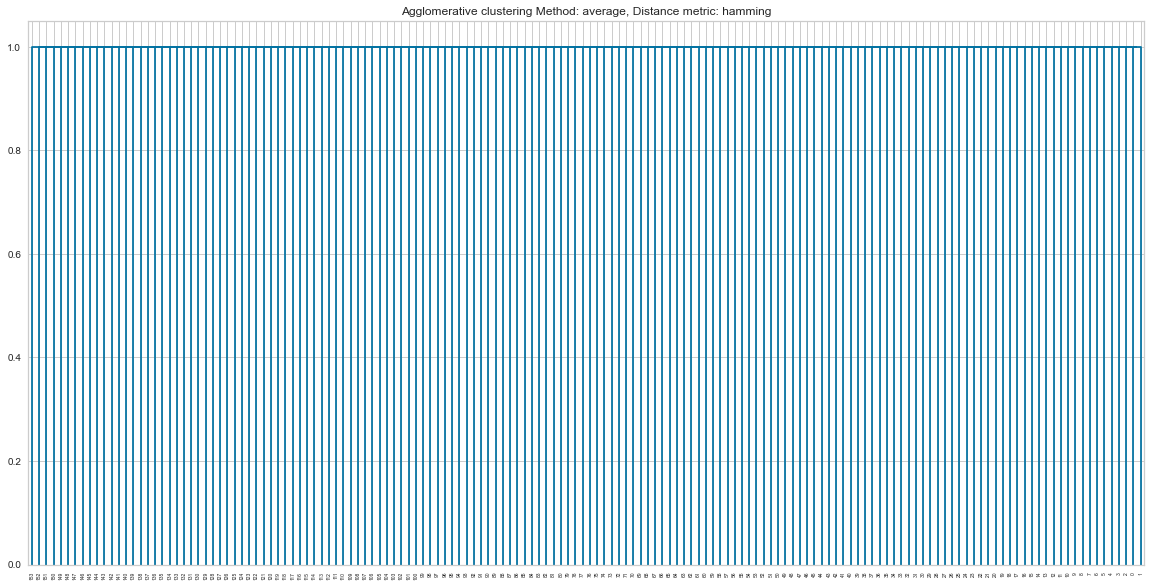

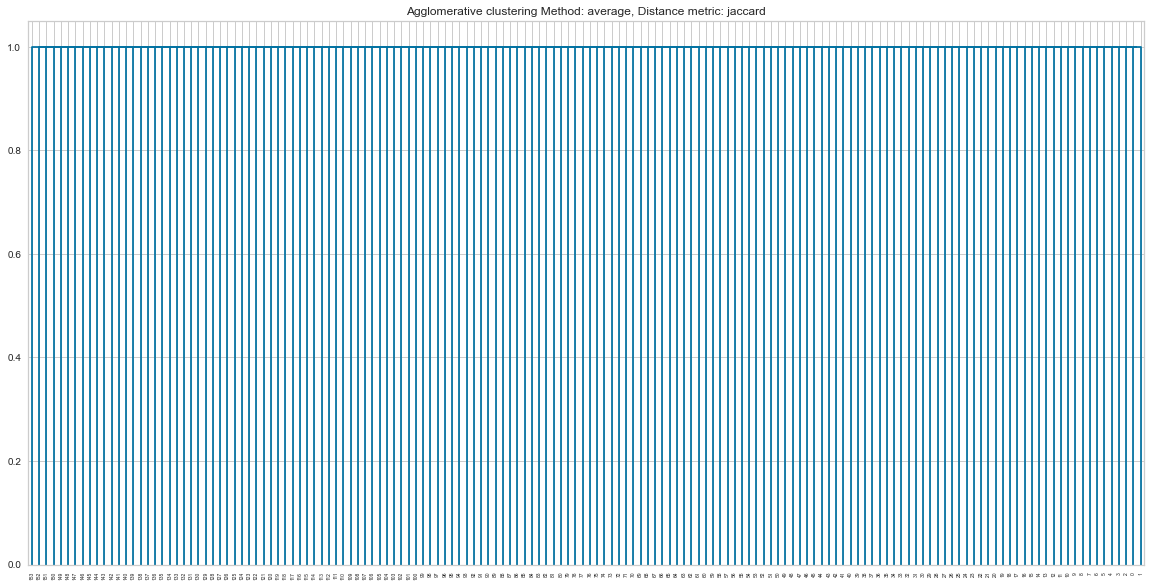

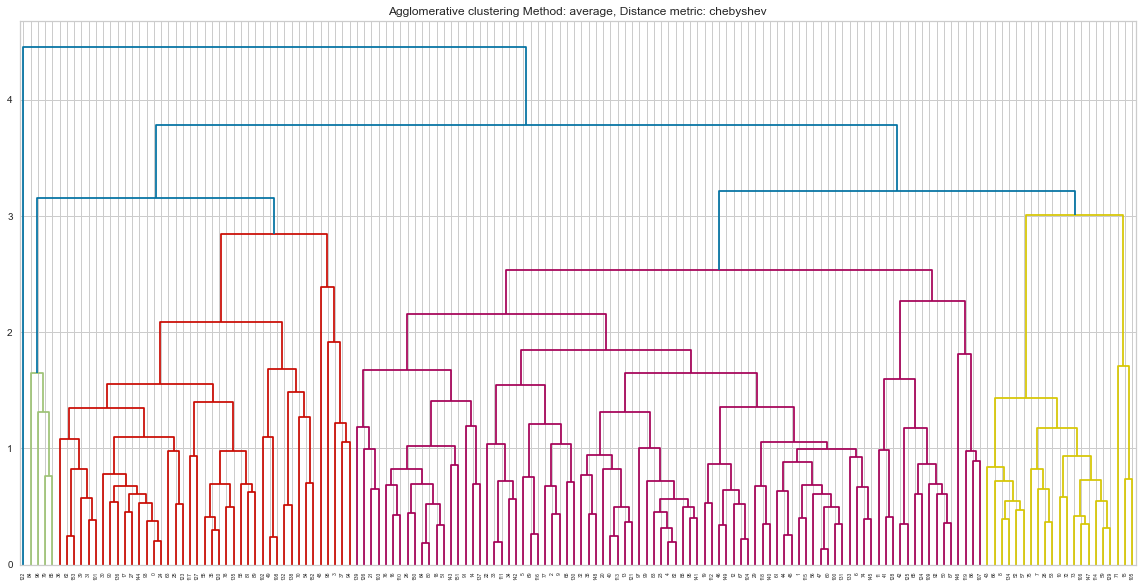

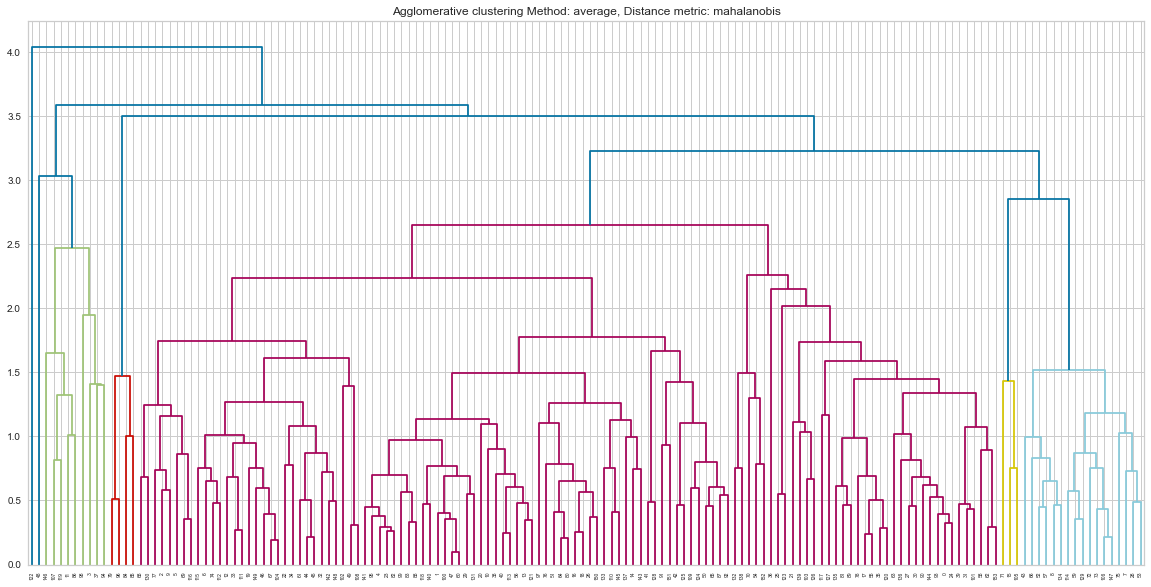

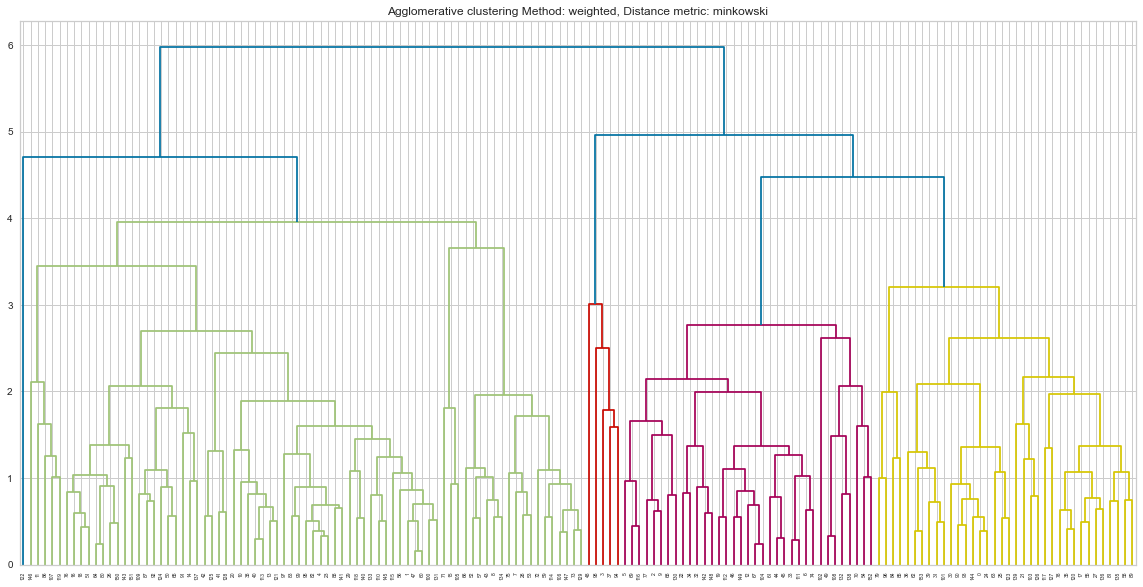

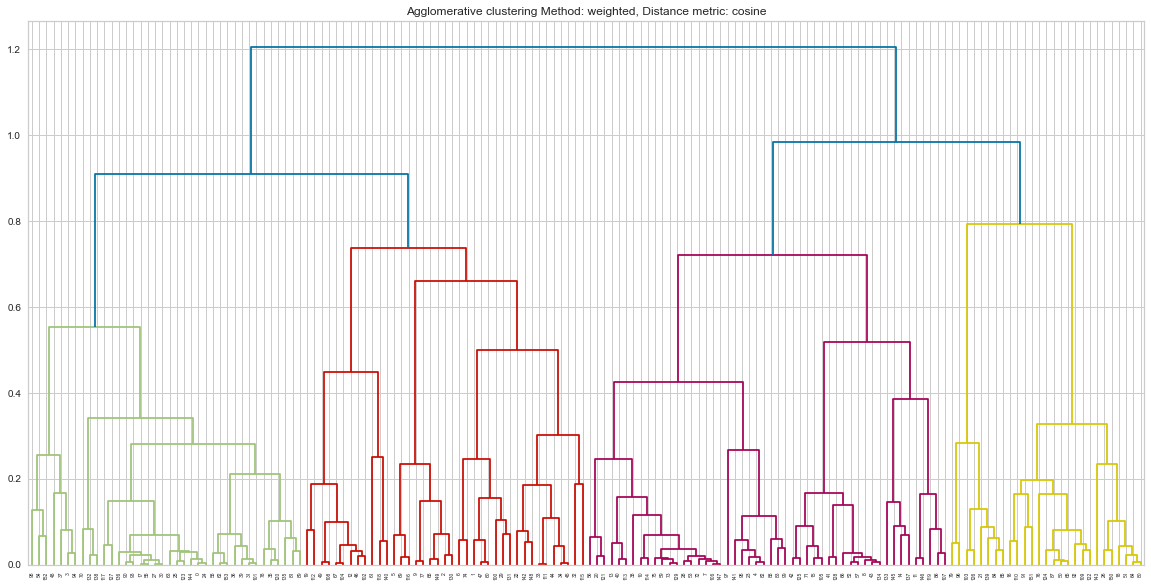

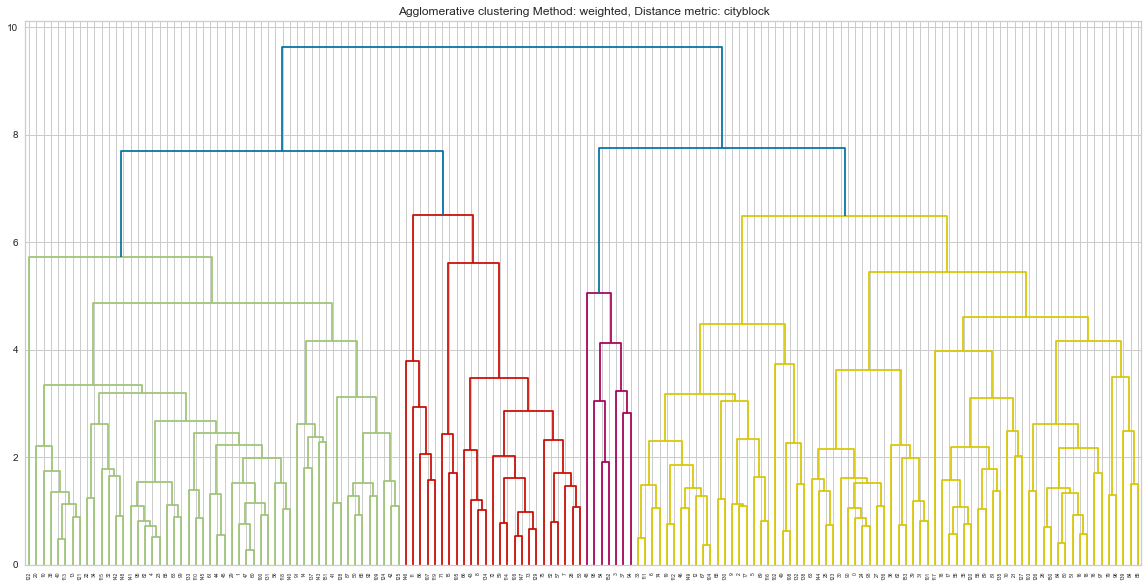

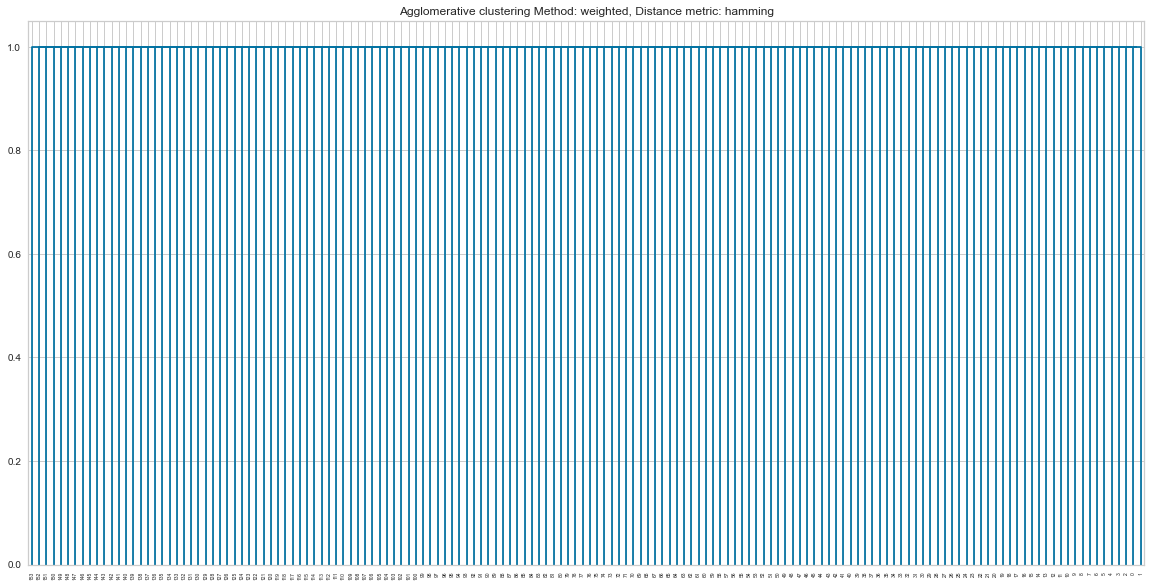

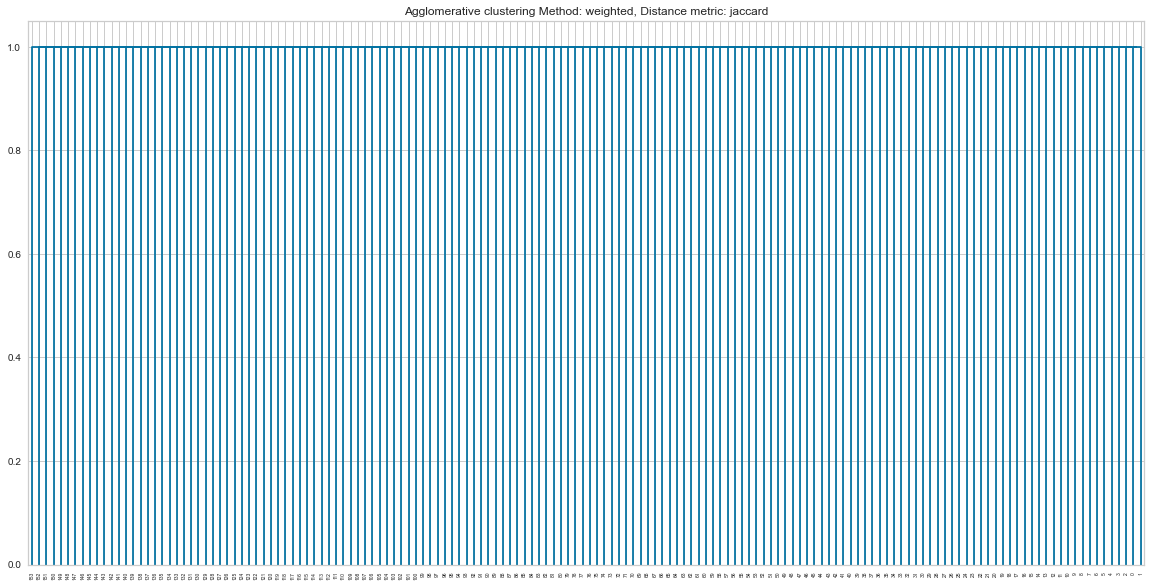

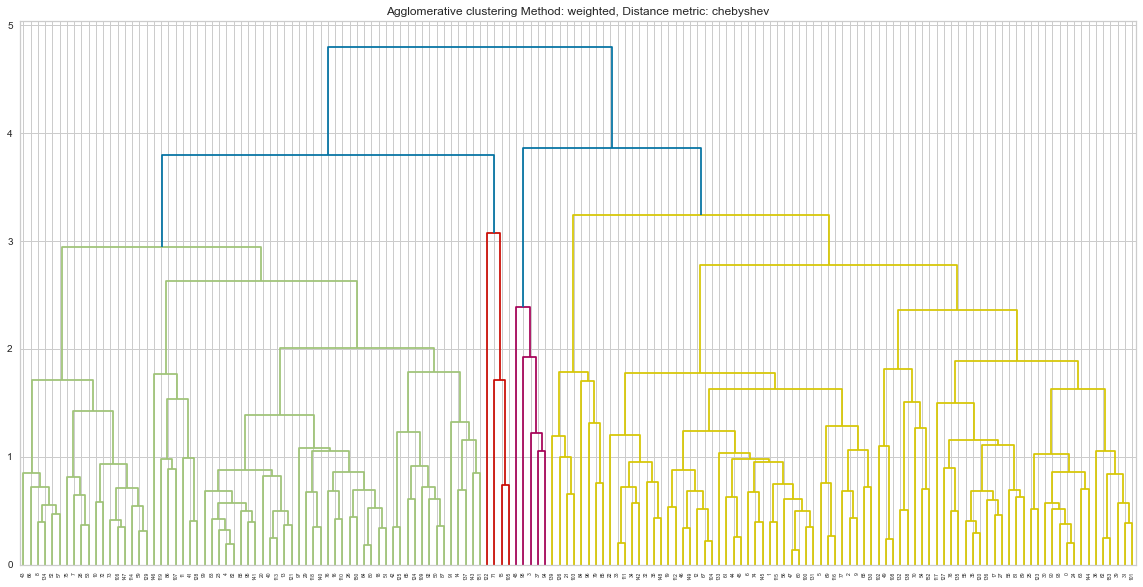

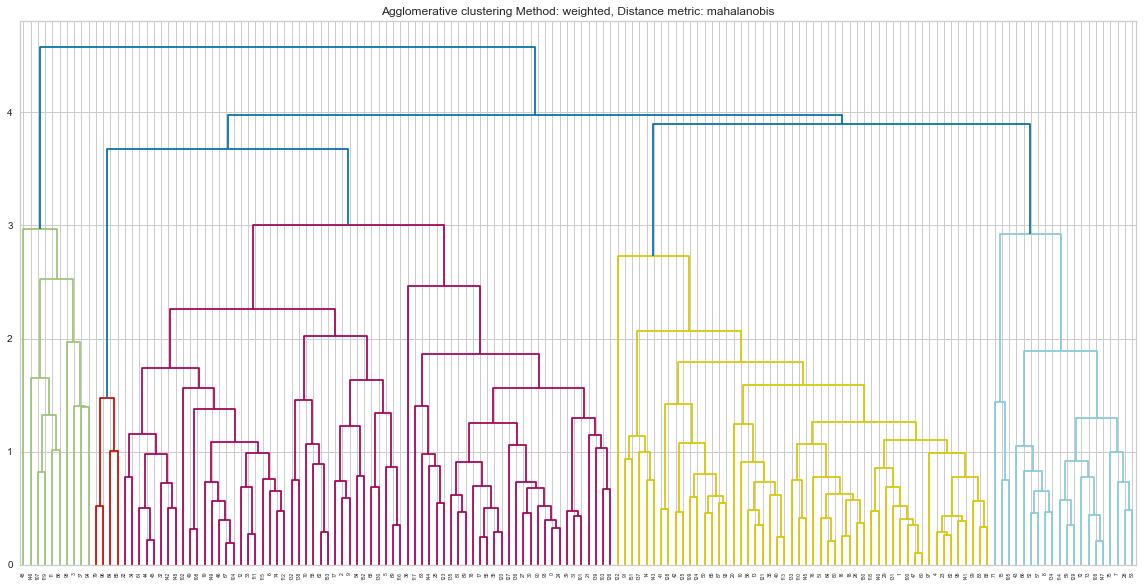

In [60]:
linkageMethods = ["single", "complete", "average", "weighted"]
distanceMetric = ["minkowski", "cosine", 'cityblock', 'hamming', 'jaccard', 'chebyshev', 'mahalanobis']

for method in linkageMethods:
    for metric in distanceMetric:
        mergings = linkage(df_pca, method=method, metric=metric)
        plt.figure(figsize = (20,10))
        plt.title("Agglomerative clustering Method: "+ method + ", Distance metric: "+ metric)
        dendrogram(mergings)
        plt.show()




# Observation : 
## 1). From Plot A, by using Complete Linkage Method using distance metric as Euclidean, if we cut the graph at y=7, we get 4 clusters.
## 2). For Plot A & B, Dendrograms using Single & Complete agglomerative test methods using distance metic as Jacard and Hamming methods are not resulting any  meaningful clusters.


# DBSCAN clustering for different min_pts and eps values

In [61]:
optimal_eps = 1
optimal_pts = 2
optimal_scoeff = -1

eps = 1.75
clusters = 1

dbdf = df_pca

while eps < 10:

    eps += 0.1
    min_pts = 0
   
    while min_pts < 25:

        min_pts +=5

        dbs = DBSCAN(eps=eps, min_samples=min_pts )
        clustering_labels = dbs.fit_predict(dbdf)
       

        if (len(pd.unique(clustering_labels)) <= 2 ):
            continue

        if (len(pd.unique(clustering_labels)) <= clusters ):
            continue

        if ( metrics.silhouette_score(dbdf, clustering_labels) <= optimal_scoeff ):
            continue

        clusters = len(pd.unique(clustering_labels))
        optimal_scoeff = metrics.silhouette_score(dbdf, clustering_labels)
        optimal_eps = eps
        optimal_pts = min_pts

In [62]:
# Clustering metric from DBSCAN with optimal eps and samples have been found
dbs = DBSCAN(eps=optimal_eps, min_samples=optimal_pts )
clustering_labels = dbs.fit_predict(dbdf)
metrics.silhouette_score(dbdf, clustering_labels)
clusters = len(pd.unique(clustering_labels))
clusters

10

In [63]:
metrics.silhouette_score(dbdf, clustering_labels)

-0.15115765464374709

# 4). Final clustering choice based on some metric

## 4a). As observed in the Silhouette Score Plot, the optimal number of clusters is : 3
## 4b). As observed in the Silhouette Visualisation , the optimal number of clusters is : 4
## 4c). As observed in the DBSCAN, the optimal number of clusters is : 10
## 4d). As observed in the Dendrogram, the optimal number of clusters is :4

## With the above observation, we conclude and proceed forward with  4 clusters with Hierarchical clustering using KMeans algorithm


# Clustering the data frame

In [64]:
kmeans = KMeans(n_clusters=4).fit(df_pca)
kmeans.labels_

array([1, 0, 3, 1, 0, 3, 3, 2, 2, 3, 2, 2, 3, 0, 0, 2, 0, 1, 0, 3, 0, 1,
       3, 0, 1, 1, 0, 1, 2, 0, 1, 1, 3, 3, 3, 1, 1, 1, 0, 1, 0, 2, 0, 2,
       3, 3, 3, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 2, 0, 3, 1, 1, 0, 0,
       2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 0, 3, 1, 1, 0, 1, 0, 0, 1, 1, 3, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 3, 1, 3, 2, 2, 3, 1, 0,
       0, 3, 3, 0, 2, 0, 3, 1, 0, 3, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 3, 0,
       1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 2, 2, 3, 3, 0, 0, 1, 1])

In [65]:
labels_df= pd.DataFrame(kmeans.labels_,columns=['ClusterID'])
final_df = pd.concat([df['country'],df_pca], axis=1, join='inner',  ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
frames = [final_df, labels_df]
final_df = pd.concat(frames, axis=1)
final_df.head()

,country,0,1,2,3,ClusterID
0,Afghanistan,3.153492,-0.522836,1.303384,0.504423,1
1,Albania,-0.574989,-0.210541,-0.226007,-1.353318,0
2,Algeria,0.320667,-0.420506,-1.882652,-0.025075,3
3,Angola,3.402623,1.228886,-1.303788,2.260647,1
4,Antigua and Barbuda,-1.347331,0.628841,-0.063370,-0.719165,0


In [66]:
final_df.shape

(154, 6)

In [67]:
final_df.tail()

,country,0,1,2,3,ClusterID
149,Timor-Leste,1.002588,-0.656189,-1.300698,-0.295285,3
150,Togo,0.850898,0.926129,0.194008,-0.709315,0
151,Tonga,-0.366545,2.401911,-0.538649,-0.466112,0
152,Tunisia,2.222326,-0.433568,-1.446079,0.864711,1
153,Turkey,3.157094,-0.053366,0.064136,1.140035,1


In [68]:
final_df.isna().sum()

country      0
0            0
1            0
2            0
3            0
ClusterID    0
dtype: int64

In [69]:
final_df.isnull().values.any()

False

In [70]:
final_df.columns

Index(['country', 0, 1, 2, 3, 'ClusterID'], dtype='object')

In [71]:
final_df = pd.merge(final_df,df,on='country',how='inner')
final_df

,country,0,1,2,3,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,3.153492,-0.522836,1.303384,0.504423,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,-0.574989,-0.210541,-0.226007,-1.353318,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,0.320667,-0.420506,-1.882652,-0.025075,3,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,3.402623,1.228886,-1.303788,2.260647,1,116.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,-1.347331,0.628841,-0.063370,-0.719165,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Timor-Leste,1.002588,-0.656189,-1.300698,-0.295285,3,62.6,2.2,9.12,27.8,1850,26.50,71.1,6.23,3600
150,Togo,0.850898,0.926129,0.194008,-0.709315,0,90.3,40.2,7.65,57.3,1210,1.18,58.7,4.87,488
151,Tonga,-0.366545,2.401911,-0.538649,-0.466112,0,17.4,12.4,5.07,60.3,4980,3.68,69.9,3.91,3550
152,Tunisia,2.222326,-0.433568,-1.446079,0.864711,1,17.4,50.5,6.21,55.3,10400,3.82,76.9,2.14,4140


In [72]:
hc_clusters_child_mort = pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(final_df.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = pd.DataFrame(final_df.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = pd.DataFrame(final_df.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = pd.DataFrame(final_df.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = pd.DataFrame(final_df.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = pd.DataFrame(final_df.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = pd.DataFrame(final_df.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(final_df.groupby(["ClusterID"]).gdpp.mean())

In [73]:
final_df2 = pd.concat([pd.Series(list(range(0,4))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
final_df2.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
final_df2

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,35.861176,47.305686,6.528039,55.001961,18422.627451,7.876392,70.594118,2.897059,13300.333333
1,1,47.053953,39.383721,6.789535,47.334884,14482.023256,7.720698,68.102326,3.383953,9394.418605
2,2,31.303077,40.888462,7.251154,45.211538,22343.769231,5.657385,70.819231,2.744615,19881.192308
3,3,30.859412,34.267912,6.827941,38.546056,14835.411765,7.575235,73.705882,2.621765,11814.441176


In [74]:
final_df2.isna().sum()

ClusterID          0
child_mort_mean    0
exports_mean       0
health_mean        0
imports_mean       0
income_mean        0
inflation_mean     0
life_expec_mean    0
total_fer_mean     0
gdpp_mean          0
dtype: int64

In [75]:
final_df2.shape

(4, 10)

In [76]:
final_df2.isnull().values.any()

False

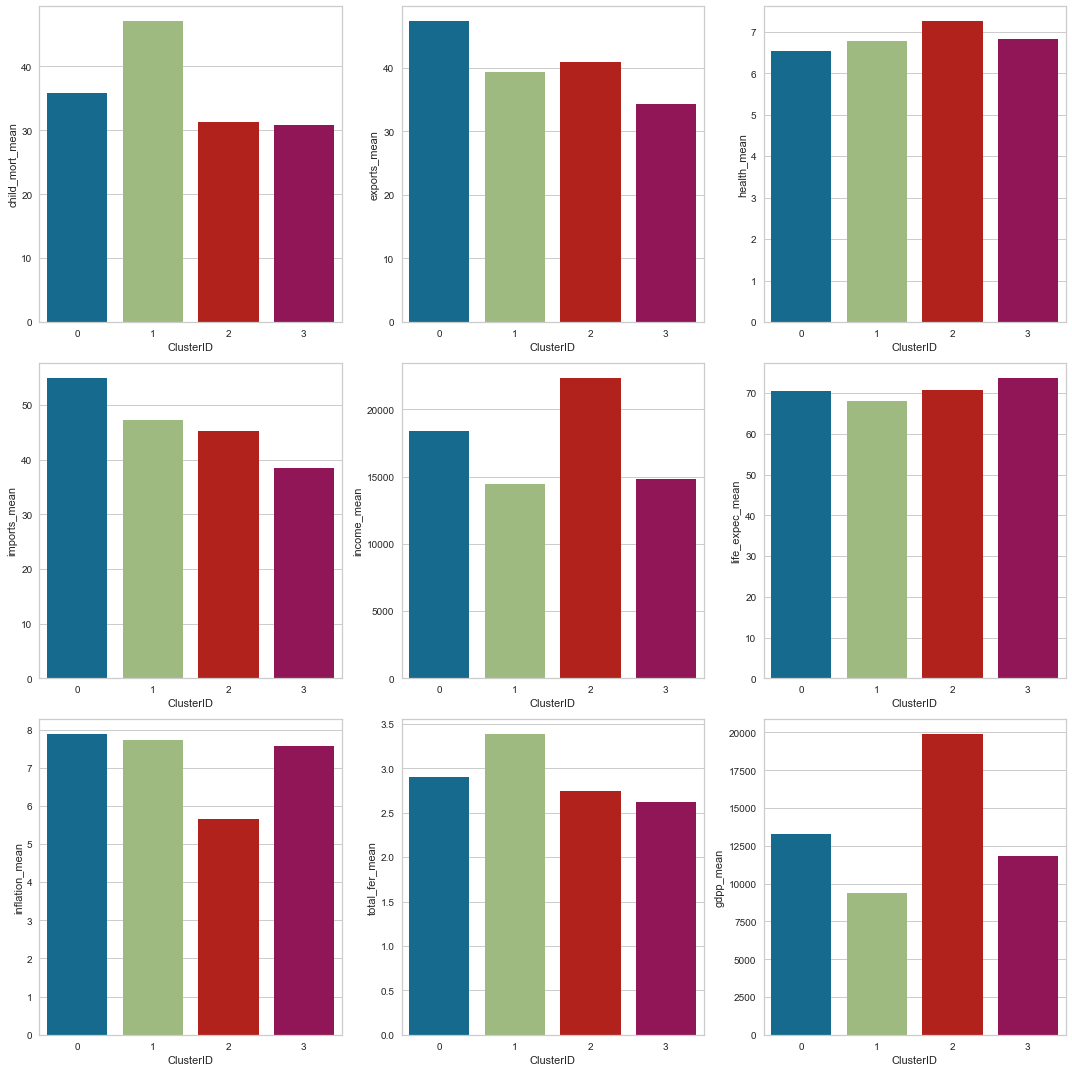

In [77]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=final_df2.ClusterID, y=final_df2.child_mort_mean, ax = axs[0,0])
sns.barplot(x=final_df2.ClusterID, y=final_df2.exports_mean, ax = axs[0,1])
sns.barplot(x=final_df2.ClusterID, y=final_df2.health_mean, ax = axs[0,2])
sns.barplot(x=final_df2.ClusterID, y=final_df2.imports_mean, ax = axs[1,0])
sns.barplot(x=final_df2.ClusterID, y=final_df2.income_mean, ax = axs[1,1])
sns.barplot(x=final_df2.ClusterID, y=final_df2.life_expec_mean, ax = axs[1,2])
sns.barplot(x=final_df2.ClusterID, y=final_df2.inflation_mean, ax = axs[2,0])
sns.barplot(x=final_df2.ClusterID, y=final_df2.total_fer_mean, ax = axs[2,1])
sns.barplot(x=final_df2.ClusterID, y=final_df2.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [78]:
df1 = final_df.loc[final_df['ClusterID'] == np.where(final_df2.gdpp_mean == np.amin(final_df2.gdpp_mean))[0][0]]
result = pd.DataFrame(df1.country)
result

,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
24,Bulgaria
25,Burkina Faso
27,Cambodia
30,Cape Verde
31,Central African Republic
35,Colombia


# 5. Clusters interpretation :

# 5.a). Our inference is based on the lower GDPP, high child mortality and less income level which can be seen in the ClusterID 3 through heuristic measures.


# 5.b). Following countries need financial aid the most :

### Afghanistan, Angola, Benin, Botswana, Bulgaria, Burkina Faso, Cambodia, Cape Verde, Central African
### Republic, Colombia, Comoros, Congo, Dem. Rep., Costa Rica, El Salvador, Equatorial Guinea, Gabon,
### Germany, Guatemala, Guinea, Jordan, Kazakhstan, Kiribati, Lao, Latvia, Libya, Lithuania, Madagascar, 
### Malawi, Micronesia, Fed. Sts., Mongolia, Namibia, Panama, Philippines, Qatar, Samoa, Sierra Leone, 
### Slovenia, Solomon Islands, South Korea, Spain, Sweden, Tunisia, Turkey

